In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# **1. Import Basic Library**

In [2]:
# Ignore Warning in Kaggle

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Data Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Computation
from scipy.stats import randint, uniform

# Sklearn Libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

# Classification Models
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier

# Scoring Method
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

In [4]:
# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows
pd.set_option('display.max_rows', None)

# Increase column width to see full content
pd.set_option('display.max_colwidth', None)

# **2. Data Loading, Vizualization and Preprocessing** 

##  **2.1. Data Loading and Cleaning**

In [5]:
# Read the Train and Test DataFrame
train_df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test_df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [6]:
train_df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0

In [7]:
# Shape of Data
print("Training Dataset Size : ", train_df.shape)
print("Test Dataset Size : ", test_df.shape)

Training Dataset Size :  (100000, 76)
Test Dataset Size :  (10000, 75)


In [8]:
# Remove Duplicated Rows from training dataset
num_duplicates = train_df.duplicated().sum()
train_df = train_df.drop_duplicates()
print(f"Successfully remove {num_duplicates} duplicate rows!")

Successfully remove 165 duplicate rows!


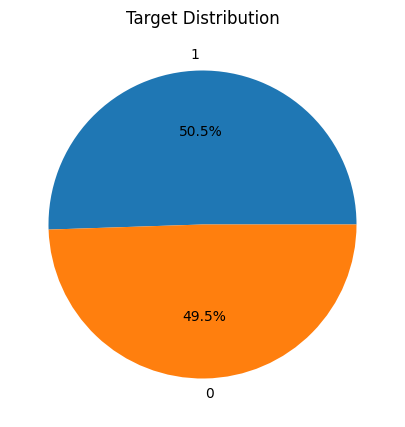

In [9]:
# Vizualization of Target Distribution
plt.figure(figsize=(8,5))
target_dist = train_df['target'].value_counts()
plt.pie(target_dist, labels=target_dist.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

### **Understanding the target distribution**

- The pie chart tited "Target Distribution" reveals a balance between two output categories.
- Both the categories have almost the same proportion of distribution so the target is balanced.

### **Finding Constant Columns and remove**

In [10]:
# Finding constant columns
constant_cols = [col for col in train_df.columns if train_df[col].nunique() == 1]
constant_cols

['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']

In [11]:
# Find the column which has more than 95% unique values
unique_cols_95 = [col for col in train_df.columns if train_df[col].nunique()/train_df.shape[0] >= 0.95]
unique_cols_95

['MachineID']

In [12]:
# Remove constant columns and unique columns
train_df.drop(constant_cols + unique_cols_95, axis=1, inplace=True)
test_df.drop(constant_cols + unique_cols_95, axis=1, inplace=True)
print("Successfully drop constant columns and more than 95% unique columns.")

Successfully drop constant columns and more than 95% unique columns.


In [13]:
# Categorize Categorical and Numerical columns in training dataframe
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns

print("No. of Numerical Columns : ", len(num_cols))
print("No. of Categorical Columns : ", len(cat_cols))

No. of Numerical Columns :  45
No. of Categorical Columns :  27


## **2.2. Perform EDA and Data vizualization**

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99835 entries, 0 to 99999
Data columns (total 72 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ProductName                         99835 non-null  object 
 1   EngineVersion                       99835 non-null  object 
 2   AppVersion                          99835 non-null  object 
 3   SignatureVersion                    99835 non-null  object 
 4   RealTimeProtectionState             99769 non-null  float64
 5   IsPassiveModeEnabled                99835 non-null  int64  
 6   AntivirusConfigID                   99759 non-null  float64
 7   NumAntivirusProductsInstalled       99759 non-null  float64
 8   NumAntivirusProductsEnabled         99759 non-null  float64
 9   HasTpm                              99835 non-null  int64  
 10  CountryID                           99835 non-null  int64  
 11  CityID                              99212 non-

**1. ProductName**

In [15]:
# Check missing values and unique values in test dataset
print("Missing Values : ", train_df['ProductName'].isna().sum())
print("Unique Values : ", train_df['ProductName'].nunique())

Missing Values :  0
Unique Values :  2


In [16]:
train_df['ProductName'].value_counts()

ProductName
win8defender    99606
mse               229
Name: count, dtype: int64

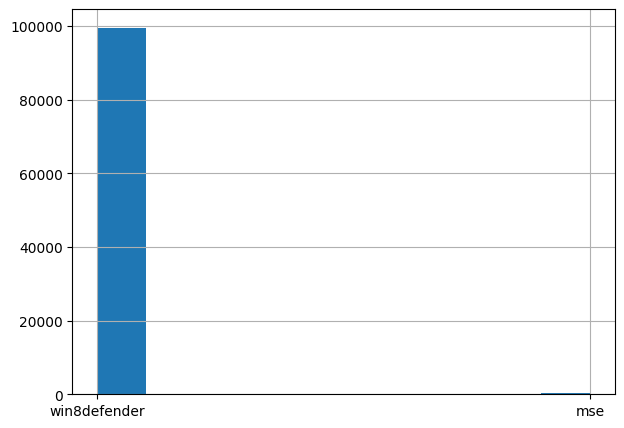

In [17]:
# Histogram for distribution
train_df['ProductName'].hist(figsize=(7, 5))
plt.show()

**Observation:**
1. There are 2 unique values in the ProductName Column.
2. win8defender has 99771 frequency and mse has 229.

**2. EngineVersion**

In [18]:
# Check missing and unique value
print('Missing Values : ', train_df['EngineVersion'].isna().sum())
print('Unique Values : ', train_df['EngineVersion'].nunique())

Missing Values :  0
Unique Values :  37


In [19]:
train_df['EngineVersion'].value_counts()

EngineVersion
1.1.15200.1    45147
1.1.15100.1    43946
1.1.15000.2     3163
1.1.14901.4     2594
1.1.14800.3     1711
1.1.15300.6      650
1.1.14700.5      593
1.1.14600.4      569
1.1.14104.0      328
1.1.15300.5      252
1.1.13504.0      212
1.1.14500.5      123
1.1.14405.2       82
1.1.14306.0       56
1.1.14202.0       50
1.1.14003.0       34
1.1.13804.0       33
1.1.13903.0       28
1.1.13303.0       27
1.1.13601.0       26
1.1.13407.0       23
1.1.14901.3       22
1.1.15000.1       21
1.1.13103.0       20
1.1.14305.0       17
1.1.14700.4       16
1.1.12902.0       15
1.1.13704.0       15
1.1.13701.0       15
1.1.13202.0       14
1.1.13000.0       10
1.1.14700.3        9
1.1.14800.1        7
1.1.14500.2        3
1.1.12805.0        2
1.1.13802.0        1
1.1.13803.0        1
Name: count, dtype: int64

<Axes: xlabel='EngineVersion'>

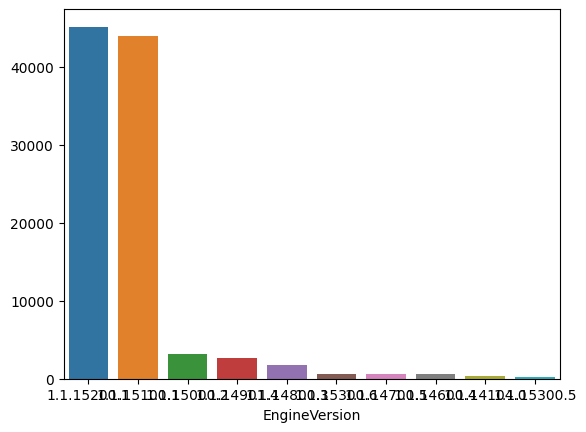

In [20]:
# Histogram for distribution for top 10 values
sns.barplot(x=train_df['EngineVersion'].value_counts().index[:10], 
            y=train_df['EngineVersion'].value_counts().values[:10])

### **Observation:**
1. There are 37 unique values in the EngineVersion column.
2. There are 1.1.15200.1 has 45219 frequency of distribution, which was highest.

**3. AppVersion**

In [21]:
# Check Missing values, unique values
print('Missing Values :', train_df['AppVersion'].isna().sum())
print('Unique Values : ', train_df['AppVersion'].nunique())

Missing Values : 0
Unique Values :  69


In [22]:
train_df['AppVersion'].value_counts()

AppVersion
4.18.1807.18075     62018
4.18.1806.18062     10458
4.12.16299.15        3229
4.16.17656.18052     2940
4.14.17639.18041     2481
4.8.10240.17443      2417
4.9.10586.1106       2272
4.13.17134.1         2136
4.13.17134.228       2118
4.10.209.0           1586
4.12.17007.18022     1266
4.9.10586.0           720
4.11.15063.447        642
4.14.17613.18039      628
4.12.17007.18011      555
4.11.15063.0          517
4.10.14393.0          494
4.8.10240.16384       452
4.10.14393.1794       356
4.11.15063.1155       328
4.9.10586.672         232
4.13.17134.191        222
4.10.14393.1198       183
4.9.10586.494         156
4.12.17007.17123      121
4.13.17134.112        116
4.10.14393.1613       113
4.9.10586.1045        112
4.9.10586.589         112
4.18.1809.2            83
4.10.14393.1593        75
4.8.10240.17946        71
4.9.10586.916          60
4.10.14393.953         59
4.10.14393.1066        56
4.9.10586.962          55
4.9.10586.873          53
4.9.10586.965          50
4

<Axes: xlabel='AppVersion'>

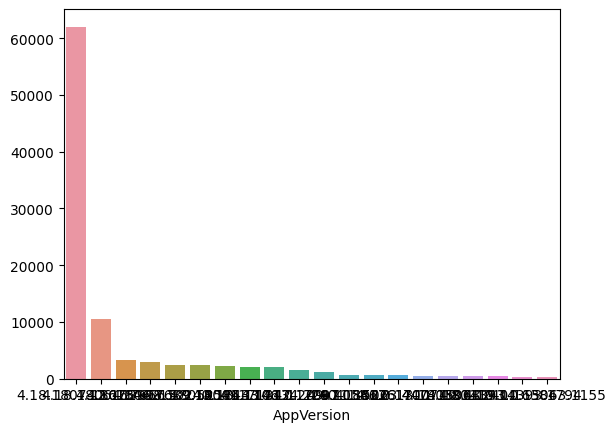

In [23]:
sns.barplot(x=train_df['AppVersion'].value_counts().index[:20], 
            y=train_df['AppVersion'].value_counts().values[:20])

**Observation:**
1. There are 69 unique values in the AppVersion Column.
2. 4.18.1807.18075 has the highest frequency (62119).

**4. SignatureVersion**

In [24]:
# Check Missing values, unique values
print("Missing Values : ",train_df['SignatureVersion'].isna().sum())
print("Unique Values : ", train_df['SignatureVersion'].nunique())

Missing Values :  0
Unique Values :  2735


In [25]:
counts = train_df['SignatureVersion'].value_counts()
counts[:50]

SignatureVersion
1.273.1420.0    1273
1.275.1140.0    1142
1.273.371.0     1068
1.275.727.0     1041
1.273.1826.0     996
1.275.1244.0     920
1.273.810.0      783
1.275.1209.0     778
1.273.1749.0     757
1.273.1005.0     605
1.273.894.0      563
1.273.1379.0     561
1.273.781.0      528
1.273.1527.0     514
1.273.1167.0     483
1.273.337.0      477
1.273.461.0      476
1.273.717.0      449
1.275.1293.0     432
1.273.950.0      429
1.275.948.0      406
1.263.48.0       392
1.273.1034.0     384
1.275.1025.0     384
1.273.1112.0     381
1.273.665.0      380
1.273.1056.0     368
1.275.112.0      365
1.273.1311.0     365
1.275.1011.0     355
1.275.1487.0     353
1.273.933.0      352
1.273.1668.0     352
1.275.263.0      351
1.275.511.0      349
1.273.1795.0     347
1.275.974.0      340
1.275.981.0      338
1.275.1669.0     334
1.273.1574.0     328
1.273.1282.0     328
1.275.1086.0     328
1.275.1458.0     327
1.273.1073.0     313
1.273.836.0      309
1.273.869.0      297
1.273.443.0      

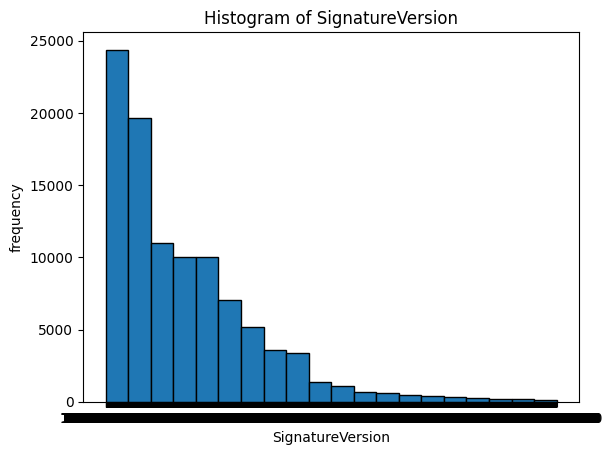

In [26]:
# To plot histogram.
plt.hist(train_df["SignatureVersion"], bins=20, ec="black")
plt.xlabel("SignatureVersion")
plt.ylabel("frequency")
plt.title("Histogram of SignatureVersion")
plt.show()

**Observation**
1. There are 2735 unique values in the dataset.
2. The data distribution is right-skewed.
3. Signature Version 1.273.1420.0 has the highest frequency.

**5. RealTimeProtectionState**

In [27]:
# Check Missing values, unique values
print("Missing Values : ",train_df['RealTimeProtectionState'].isna().sum())
print("Unique Values : ",train_df['RealTimeProtectionState'].nunique())

Missing Values :  66
Unique Values :  6


In [28]:
train_df['RealTimeProtectionState'].value_counts()

RealTimeProtectionState
7.0    97212
0.0     2111
5.0      210
8.0      206
3.0       19
1.0       11
Name: count, dtype: int64

<Axes: xlabel='RealTimeProtectionState'>

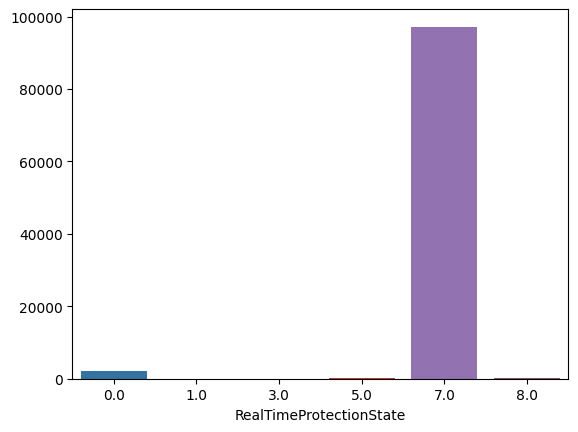

In [29]:
sns.barplot(x=train_df['RealTimeProtectionState'].value_counts().index, 
            y=train_df['RealTimeProtectionState'].value_counts().values)

**Observation**
1. There are 66 missing values and 6 unique value in the dataset.
2. State 7.0 has the highest frequency.

**6. IsPassiveModeEnabled**

In [30]:
# Check Missing values, unique values
print("Missing Values : ",train_df['IsPassiveModeEnabled'].isna().sum())
print("Unique Values : ",train_df['IsPassiveModeEnabled'].nunique())

Missing Values :  0
Unique Values :  2


In [31]:
train_df['IsPassiveModeEnabled'].value_counts()

IsPassiveModeEnabled
0    98074
1     1761
Name: count, dtype: int64

<Axes: xlabel='IsPassiveModeEnabled'>

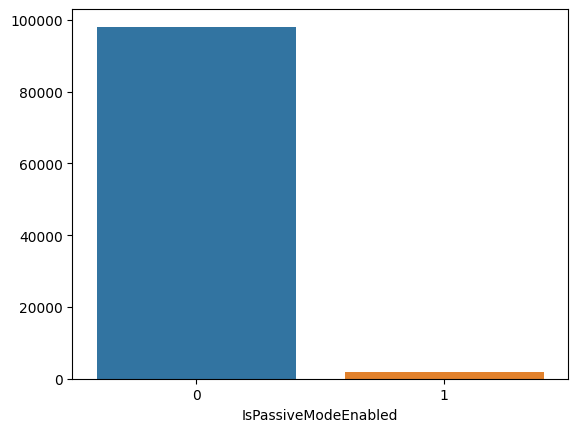

In [32]:
sns.barplot(x=train_df['IsPassiveModeEnabled'].value_counts().index, 
            y=train_df['IsPassiveModeEnabled'].value_counts().values)

**Observation:**
1. There are two unique values in the column such as 0 and 1.
2. The frequency of 0 is much greater than frequency of 1.
3. 0 has total of 98239 frequency in the IsPassiveModeEnabled column.

**7. AntivirusConfigID**

In [33]:
# Check Missing values, unique values
print("Missing Values : ",train_df['AntivirusConfigID'].isna().sum())
print("Unique Values : ", train_df['AntivirusConfigID'].nunique())

Missing Values :  76
Unique Values :  1976


<Axes: xlabel='AntivirusConfigID', ylabel='Count'>

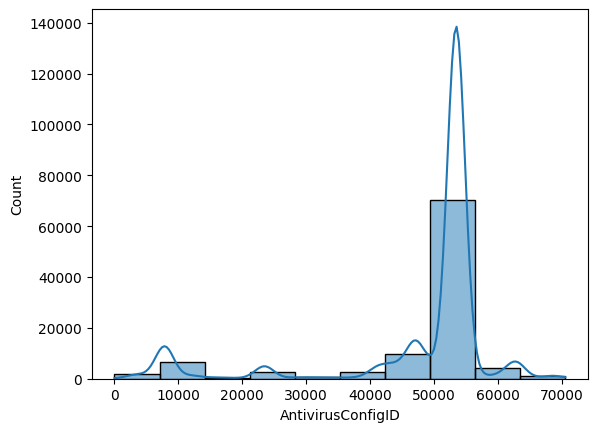

In [34]:
sns.histplot(train_df['AntivirusConfigID'], bins=10, kde=True)

**Observation:**
1. There are 76 missing values and 1976 unique values in the column AntivirusConfigID.
2. The most frequency is lie between the bin of 50000 to 60000.
3. The data distribution is almost like left skewed distribution.

**8. NumAntivirusProductsInstalled**

In [35]:
# Check Missing values, unique values
print("Missing Values : ",train_df['NumAntivirusProductsInstalled'].isna().sum())
print("Unique Values : ",train_df['NumAntivirusProductsInstalled'].nunique())

Missing Values :  76
Unique Values :  5


In [36]:
train_df['NumAntivirusProductsInstalled'].value_counts()

NumAntivirusProductsInstalled
1.0    69639
2.0    27773
3.0     2252
4.0       90
5.0        5
Name: count, dtype: int64

<Axes: xlabel='NumAntivirusProductsInstalled'>

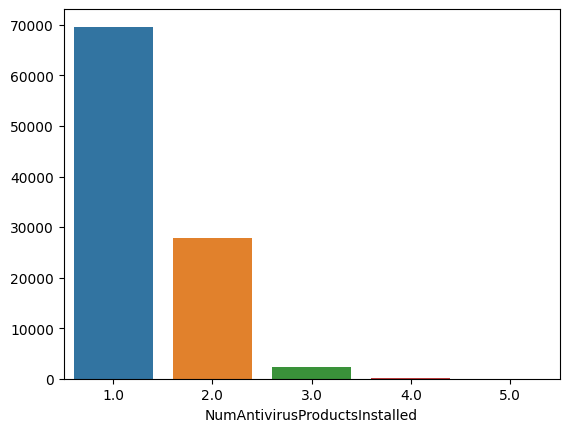

In [37]:
sns.barplot(x=train_df['NumAntivirusProductsInstalled'].value_counts().index, 
            y=train_df['NumAntivirusProductsInstalled'].value_counts().values)

<Axes: xlabel='NumAntivirusProductsInstalled'>

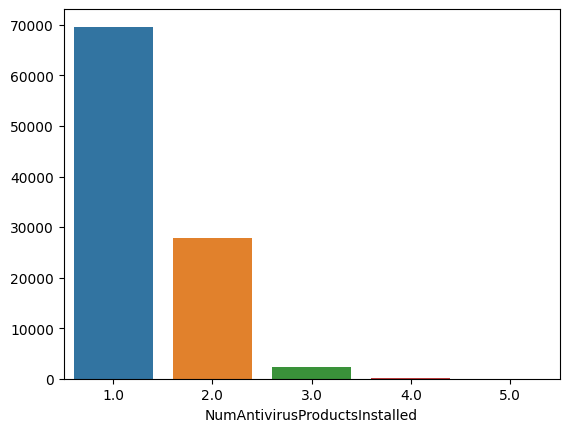

In [38]:
sns.barplot(x=train_df['NumAntivirusProductsInstalled'].value_counts().index, 
            y=train_df['NumAntivirusProductsInstalled'].value_counts().values)

**Observation:**
1. There are 76 missing values and 5 unique values in the column.
2. Column labeled as 1.0 has the most frequency with 69639 value counts.

**9. NumAntivirusProductsEnabled**

In [39]:
# Check Missing values, unique values
print("Missing Values : ",train_df['NumAntivirusProductsEnabled'].isna().sum())
print("Unique Values : ",train_df['NumAntivirusProductsEnabled'].nunique())
train_df['NumAntivirusProductsEnabled'].value_counts()

Missing Values :  76
Unique Values :  5


NumAntivirusProductsEnabled
1.0    97506
2.0     1949
0.0      247
3.0       55
4.0        2
Name: count, dtype: int64

<Axes: xlabel='NumAntivirusProductsEnabled'>

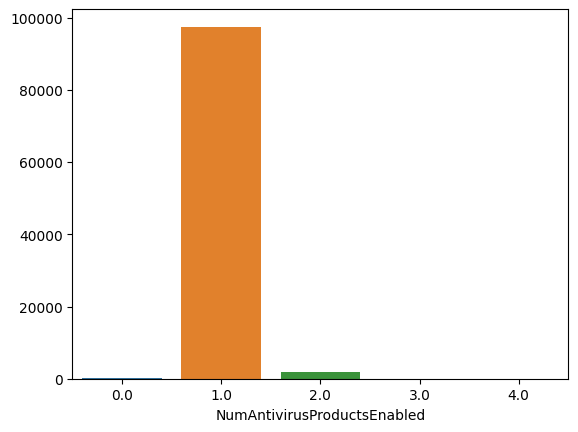

In [40]:
sns.barplot(x=train_df['NumAntivirusProductsEnabled'].value_counts().index, 
            y=train_df['NumAntivirusProductsEnabled'].value_counts().values)

**Observation:**
1. There are 76 missing values and 5 unique values in the column.
2. Value 1.0 has the highest frequency with 97506 value counts.

**10. HasTpm**

In [41]:
# Check Missing values, unique values
print("Missing Values : ",train_df['HasTpm'].isna().sum())
print("Unique Values : ", train_df['HasTpm'].nunique())

Missing Values :  0
Unique Values :  2


In [42]:
train_df['HasTpm'].value_counts()

HasTpm
1    99513
0      322
Name: count, dtype: int64

<Axes: xlabel='HasTpm'>

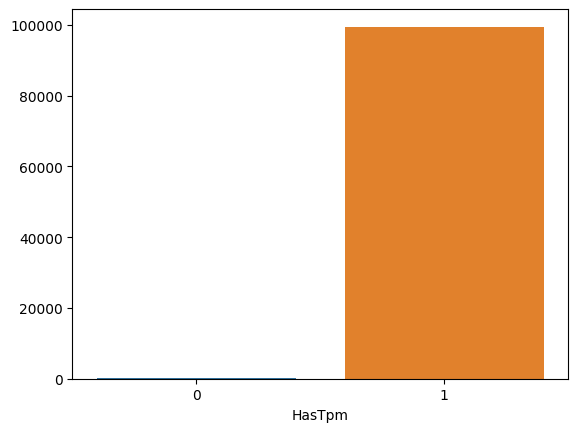

In [43]:
sns.barplot(x=train_df['HasTpm'].value_counts().index, 
            y=train_df['HasTpm'].value_counts().values)

**Observation:**
1. There are 2 unique values in the column.
2. Value 1 has the highest frequency with 99678 value counts.
   

**11. CountryID**

In [44]:
# Check Missing values, unique values
print("Missing Values : ",train_df['CountryID'].isna().sum())
print("Unique Values : ",train_df['CountryID'].nunique())

Missing Values :  0
Unique Values :  220


<Axes: xlabel='CountryID', ylabel='Density'>

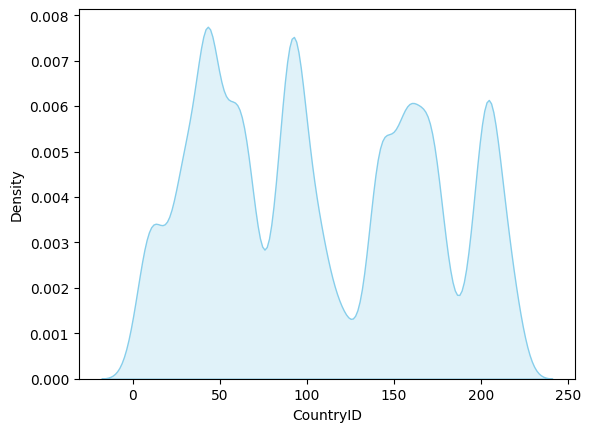

In [45]:
sns.kdeplot(train_df['CountryID'], color='skyblue', fill=True)

**Observation:**
1. There are 220 unique values in the coulumn CountryID.
2. This chart indicated that some CountryIDs appears more frequently than others.

**12. CityID**

In [46]:
# Check Missing values, unique values
print("Missing Values : ",train_df['CityID'].isna().sum())
print("Unique Values : ",train_df['CityID'].nunique())

Missing Values :  623
Unique Values :  16047


<Axes: xlabel='CityID', ylabel='Density'>

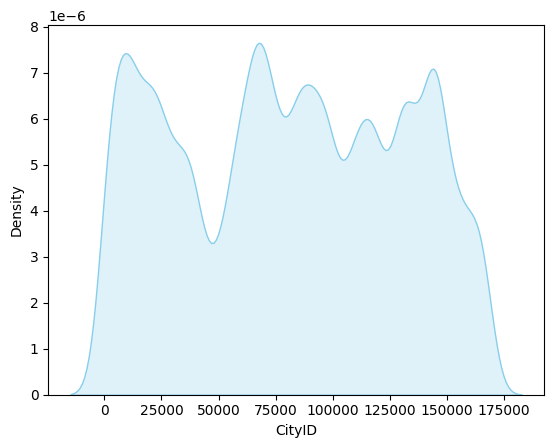

In [47]:
sns.kdeplot(train_df['CityID'], color='skyblue', fill=True)

**Observation:**
1. There are 623 missing values and 16047 unique values in the column.
2. Some CityID appears more than others.

**13. GeoRegionID**

In [48]:
# Check Missing values, unique values
print("Missing Values : ",train_df['GeoRegionID'].isna().sum())
print("Unique Values : ",train_df['GeoRegionID'].nunique())

Missing Values :  0
Unique Values :  239


<Axes: xlabel='GeoRegionID', ylabel='Density'>

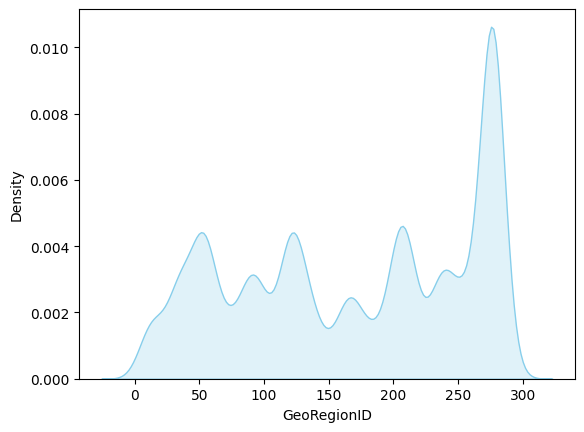

In [49]:
sns.kdeplot(train_df['GeoRegionID'], color='skyblue', fill=True)

**Observation:**
1. There are 239 unique values in the column.
2. The data distribution is likely to left-skewed distribution.

**14. LocaleEnglishNameID**

In [50]:
# Check Missing values, unique values
print("Missing Values : ",train_df['LocaleEnglishNameID'].isna().sum())
print("Unique Values : ",train_df['LocaleEnglishNameID'].nunique())

Missing Values :  0
Unique Values :  185


<Axes: xlabel='LocaleEnglishNameID', ylabel='Density'>

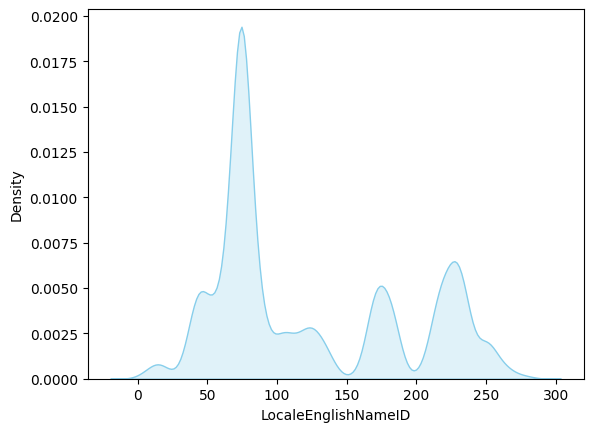

In [51]:
sns.kdeplot(train_df['LocaleEnglishNameID'], color='skyblue', fill=True)

**Observation:**
1. There are 185 unique values in the column.
2. The data distribution is right-skewed distribution.

**15. PlatformType**

In [52]:
# Check Missing values, unique values
print("Missing Values : ",train_df['PlatformType'].isna().sum())
print("Unique Values : ",train_df['PlatformType'].nunique())

Missing Values :  0
Unique Values :  4


In [53]:
train_df['PlatformType'].value_counts()

PlatformType
windows10      98183
windows8        1397
windows7         226
windows2016       29
Name: count, dtype: int64

<Axes: xlabel='PlatformType'>

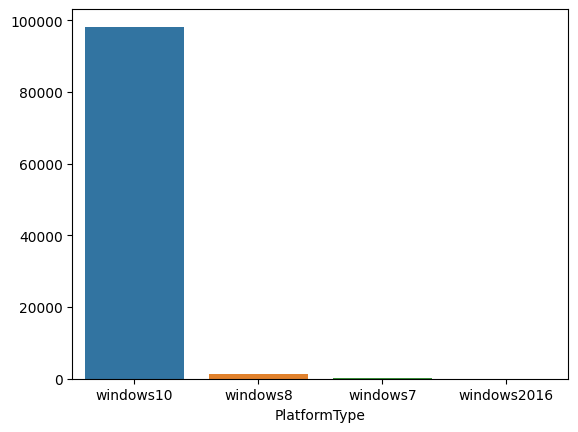

In [54]:
sns.barplot(x=train_df['PlatformType'].value_counts().index, 
            y=train_df['PlatformType'].value_counts().values)

**Observation:**
1. There are 4 unique values in the column.
2. Windows10 has highest frequency with 98183 valuecounts.

**16. Processor**

In [55]:
# Check Missing values, unique values
print("Missing Values : ", train_df['Processor'].isna().sum())
print("Unique Values : ", train_df['Processor'].nunique())

Missing Values :  0
Unique Values :  3


In [56]:
train_df['Processor'].value_counts()

Processor
x64      91110
x86       8720
arm64        5
Name: count, dtype: int64

<Axes: xlabel='Processor'>

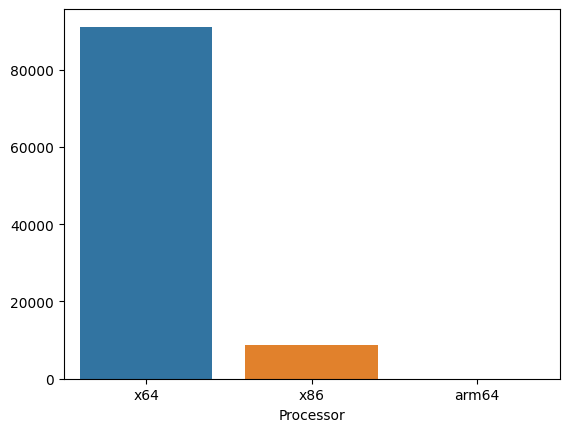

In [57]:
sns.barplot(x=train_df['Processor'].value_counts().index, 
            y=train_df['Processor'].value_counts().values)

**Observation:**
1. There are three unique value in the column.
2. x64 has the highest frequency with 91110 valuecounts.

**17. OSVersion**

In [58]:
# Check Missing values, unique values for OSVersion
print("Missing Values : ",train_df['OSVersion'].isna().sum())
print("Unique Values : ",train_df['OSVersion'].nunique())

Missing Values :  0
Unique Values :  7


In [59]:
train_df['OSVersion'].value_counts()

OSVersion
10.0.0.0    98207
6.3.0.0      1397
6.1.1.0       226
10.0.1.0        2
10.0.2.0        1
10.0.3.0        1
10.0.4.0        1
Name: count, dtype: int64

<Axes: xlabel='OSVersion'>

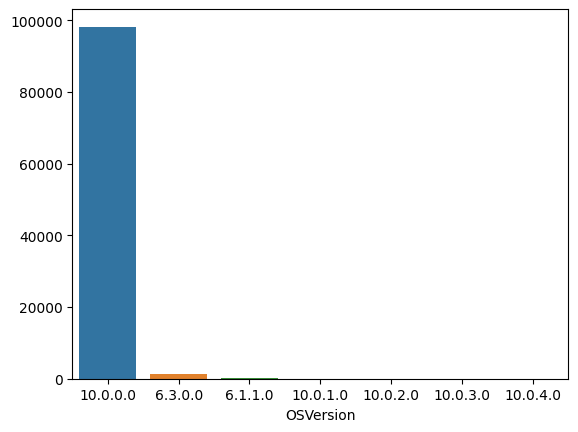

In [60]:
sns.barplot(x=train_df['OSVersion'].value_counts().index, 
            y=train_df['OSVersion'].value_counts().values)

**Observation:**
1. There are 7 unique value in the dataset.
2. 10.0.0.0 has the highest frequency with 98207 valuecounts.
3. 10.0.4.0 has the lowest frequency with 1 valuecounts.

**18. OSBuildNumber**

In [61]:
# Check Missing values, unique values for OSBuildNumber
print("Missing Values : ",train_df['OSBuildNumber'].isna().sum())
print("Unique Values : ",train_df['OSBuildNumber'].nunique())

Missing Values :  0
Unique Values :  24


In [62]:
train_df['OSBuildNumber'].value_counts()

OSBuildNumber
17134    45764
16299    29579
15063     8365
14393     7366
10586     3865
10240     3100
9600      1397
7601       226
17744       26
17692       26
17738       20
17758       14
17735       14
17741       14
17746       14
17713       11
17755        7
17763        6
17751        6
17760        5
17672        4
17754        3
17730        2
17686        1
Name: count, dtype: int64

<Axes: xlabel='OSBuildNumber', ylabel='Density'>

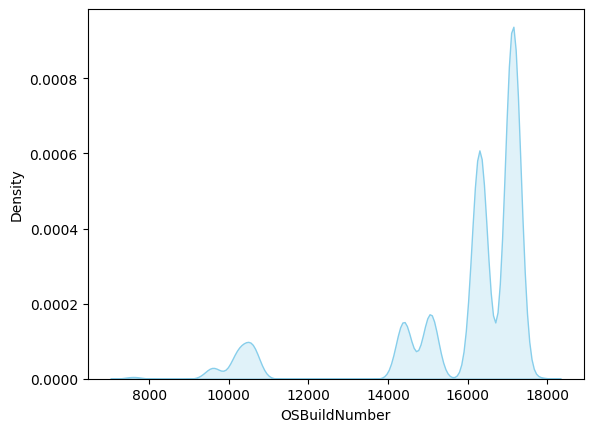

In [63]:
sns.kdeplot(train_df['OSBuildNumber'], color='skyblue', fill=True)

**Observation:**
1. There are 24 unique values in the column.
2. The data-distribution is left skewed distribution.
3. Bin 17000-18000 has the highest frequency.

**19. OSBuildSuite**

In [64]:
# Check Missing values, unique values for OSProductSuite
print("Missing Values : ",train_df['OSProductSuite'].isna().sum())
print("Unique Values : ",train_df['OSProductSuite'].nunique())

Missing Values :  0
Unique Values :  7


In [65]:
train_df['OSProductSuite'].value_counts()

OSProductSuite
768    62861
256    36941
272       25
784        3
16         2
305        2
400        1
Name: count, dtype: int64

<Axes: xlabel='OSProductSuite'>

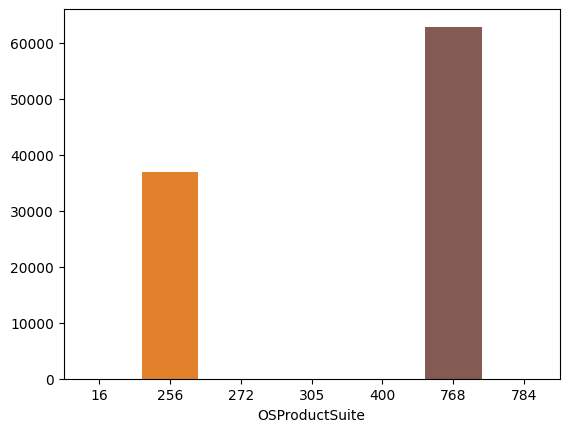

In [66]:
sns.barplot(x=train_df['OSProductSuite'].value_counts().index, 
            y=train_df['OSProductSuite'].value_counts().values)

**Observation:**
1. There are 7 unique values in the column.
2. 768 has the highest frequency with 62861 valuecounts.
3. 400 has the lowest frequency with 1 valuecounts.

**20. OsPlatformSubRelease**

In [67]:
# Check Missing values, unique values for OsPlatformSubRelease
print("Missing Values : ",train_df['OsPlatformSubRelease'].isna().sum())
print("Unique Values : ",train_df['OsPlatformSubRelease'].nunique())

Missing Values :  0
Unique Values :  9


In [68]:
train_df['OsPlatformSubRelease'].value_counts()

OsPlatformSubRelease
rs4           45764
rs3           29579
rs2            8365
rs1            7366
th2            3865
th1            3100
windows8.1     1397
windows7        226
prers5          173
Name: count, dtype: int64

<Axes: xlabel='OsPlatformSubRelease', ylabel='Count'>

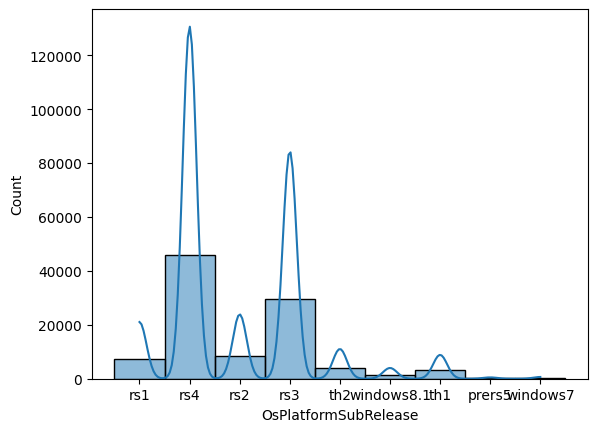

In [69]:
sns.histplot(train_df['OsPlatformSubRelease'], bins=10, kde=True)

**Observation:**
1. There are 9 unique values in the column.
2. rs4 has the highest frequency with 45837 valuecounts.
3. The data distribution is right skewed data distribution.

**21. OSBuildLab**

In [70]:
# Check Missing values, unique values for OSBuildLab
print("Missing Values : ",train_df['OSBuildLab'].isna().sum())
print("Unique Values : ",train_df['OSBuildLab'].nunique())

Missing Values :  0
Unique Values :  281


In [71]:
train_df['OSBuildLab'].value_counts()[:20]

OSBuildLab
17134.1.amd64fre.rs4_release.180410-1804                 42895
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908    15129
16299.15.amd64fre.rs3_release.170928-1534                11089
15063.0.amd64fre.rs2_release.170317-1834                  7747
17134.1.x86fre.rs4_release.180410-1804                    2865
16299.15.x86fre.rs3_release.170928-1534                   2761
14393.2189.amd64fre.rs1_release.180329-1711               2201
10240.17443.amd64fre.th1.170602-2340                      2006
10586.1176.amd64fre.th2_release_sec.170913-1848           1658
15063.0.x86fre.rs2_release.170317-1834                     618
14393.2189.x86fre.rs1_release.180329-1711                  471
16299.637.amd64fre.rs3_release_svc.180808-1748             461
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033        416
10586.1176.x86fre.th2_release_sec.170913-1848              415
10240.17443.x86fre.th1.170602-2340                         411
9600.19101.amd64fre.winblue_ltsb_escrow.1807

<Axes: xlabel='OSBuildLab'>

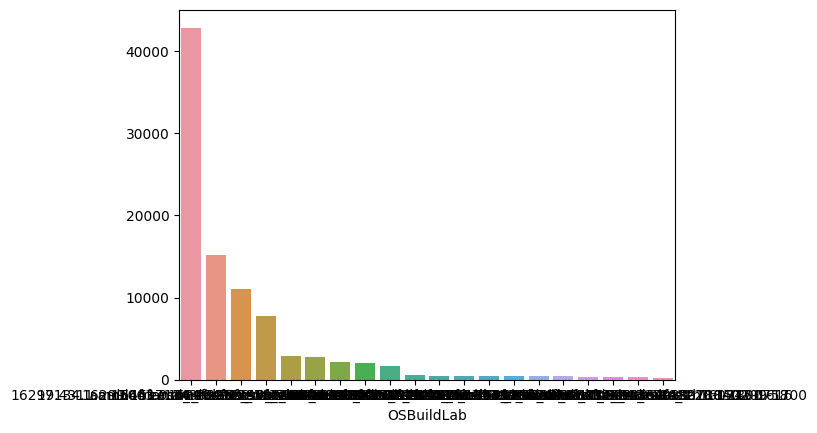

In [72]:
# Bar chart of Top OSBuildLab
top_os_builds = train_df['OSBuildLab'].value_counts().nlargest(20)

sns.barplot(x=top_os_builds.index, 
            y=top_os_builds.values)

**Observation:**
1. There are 281 unique values in the column.
2. one column has approx 45% of valuecounts of total frequecny.

**22. SKUEditionName**

In [73]:
# Check Missing values, unique values for SKUEditionName
print("Missing Values : ",train_df['SKUEditionName'].isna().sum())
print("Unique Values : ",train_df['SKUEditionName'].nunique())

Missing Values :  0
Unique Values :  8


In [74]:
train_df['SKUEditionName'].value_counts()

SKUEditionName
Home               62758
Pro                35694
Education            503
Enterprise           387
Enterprise LTSB      250
Invalid              176
Cloud                 61
Server                 6
Name: count, dtype: int64

<Axes: xlabel='SKUEditionName'>

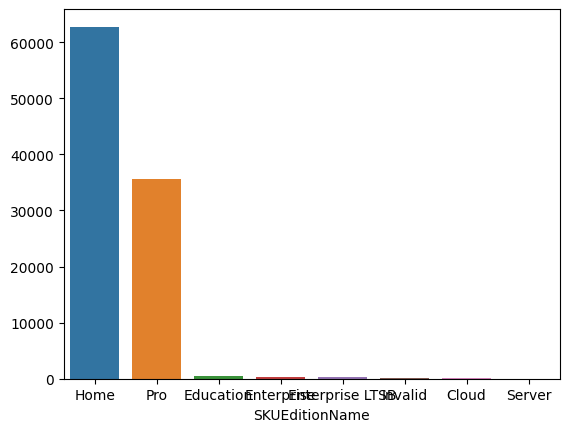

In [75]:
sns.barplot(x=train_df['SKUEditionName'].value_counts().index, 
            y=train_df['SKUEditionName'].value_counts().values)

**Observation:**
1. There are 8 unique values in the column.
2. Home and pro have the most frequncy of the column.

**23. SMode**

In [76]:
# Check Missing values, unique values for SMode
print("Missing Values : ",train_df['SMode'].isna().sum())
print("Unique Values : ", train_df['SMode'].nunique())

Missing Values :  981
Unique Values :  2


In [77]:
train_df['SMode'].value_counts()

SMode
0.0    98804
1.0       50
Name: count, dtype: int64

<Axes: xlabel='SMode'>

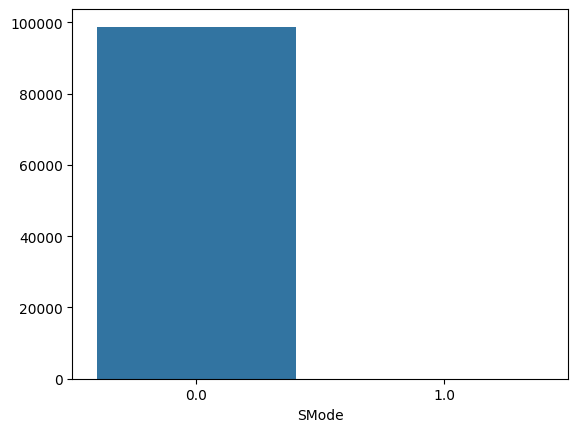

In [78]:
sns.barplot(x=train_df['SMode'].value_counts().index, 
            y=train_df['SMode'].value_counts().values)

**Observation:**
1. There are 981 missing values and  2 unique values in the column.
2. The data distribution is binary.
3. 0 has the highest frequency of the distribution.

**24. IsSystemProtected**

In [79]:
# Check Missing values, unique values for IsSystemProtected 
print("Missing Values : ", train_df['IsSystemProtected'].isna().sum())
print("Unique Values : ",train_df['IsSystemProtected'].nunique())

Missing Values :  76
Unique Values :  2


In [80]:
train_df['IsSystemProtected'].value_counts()

IsSystemProtected
1.0    95304
0.0     4455
Name: count, dtype: int64

<Axes: xlabel='IsSystemProtected'>

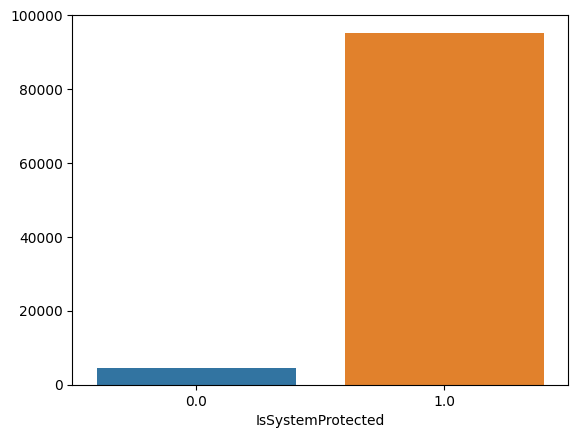

In [81]:
sns.barplot(x=train_df['IsSystemProtected'].value_counts().index, 
            y=train_df['IsSystemProtected'].value_counts().values)

**Observation:**
1. There are 76 missing values and 2 unique values in the column.
2. 1.0 has the highest frequency.

**25. IEVersionID**

In [82]:
# Check Missing values, unique values for IEVersionID
print("Missing Values : ",train_df['IEVersionID'].isna().sum())
print("Unique Values : ",train_df['IEVersionID'].nunique())

Missing Values :  107
Unique Values :  102


In [83]:
train_df['IEVersionID'].value_counts()

IEVersionID
137.0    45708
117.0    21491
108.0     5459
111.0     5082
98.0      3903
135.0     2564
53.0      2416
74.0      2267
105.0     1549
94.0      1384
107.0     1350
103.0     1163
333.0     1135
96.0       903
76.0       558
114.0      409
41.0       345
323.0      221
87.0       173
73.0       112
71.0        91
42.0        88
82.0        83
81.0        73
78.0        72
68.0        70
335.0       62
85.0        62
334.0       61
91.0        60
86.0        59
92.0        55
90.0        53
72.0        50
84.0        50
88.0        43
302.0       36
163.0       26
185.0       25
65.0        23
180.0       20
44.0        18
337.0       18
64.0        17
50.0        17
52.0        15
199.0       14
178.0       14
182.0       14
63.0        14
186.0       14
49.0        14
102.0       11
46.0        11
169.0       11
332.0       10
47.0        10
51.0         9
331.0        9
295.0        8
322.0        8
48.0         7
66.0         7
45.0         7
196.0        7
205.0        

<Axes: xlabel='IEVersionID', ylabel='Density'>

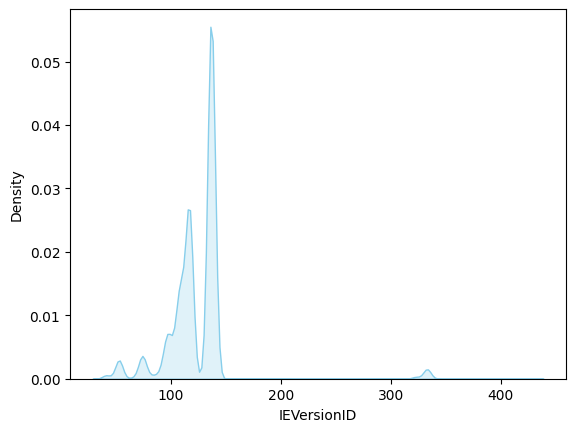

In [84]:
sns.kdeplot(train_df['IEVersionID'], color='skyblue', fill=True)

**Observation:**
1. There are 107 missing values and 102 unique values in the column.
2. Bin 100-150 has the most frequency.
3. The data distribution is right-skewed.

**26. FirewallEnabled**

In [85]:
# Check Missing values, unique values for FirewallEnabled
print("Missing Values : ",train_df['FirewallEnabled'].isna().sum())
print("Unique Values : ",train_df['FirewallEnabled'].nunique())

Missing Values :  166
Unique Values :  2


In [86]:
train_df['FirewallEnabled'].value_counts()

FirewallEnabled
1.0    97682
0.0     1987
Name: count, dtype: int64

<Axes: xlabel='FirewallEnabled'>

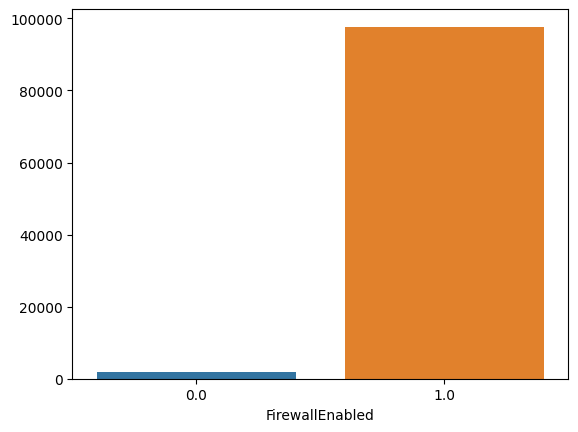

In [87]:
sns.barplot(x=train_df['FirewallEnabled'].value_counts().index, 
            y=train_df['FirewallEnabled'].value_counts().values)

**Observation:**
1. There are 166 missing values and 2 unique values in the column.
2. 1 has the highest frequency.
3. The data distribution is binary.

**27. EnableLUA**

In [88]:
# Check Missing values, unique values for EnableLUA
print("Missing Values : ",train_df['EnableLUA'].isna().sum())
print("Unique Values : ",train_df['EnableLUA'].nunique())

Missing Values :  19
Unique Values :  3


In [89]:
train_df['EnableLUA'].value_counts()

EnableLUA
1.0     99332
0.0       481
48.0        3
Name: count, dtype: int64

<Axes: xlabel='EnableLUA'>

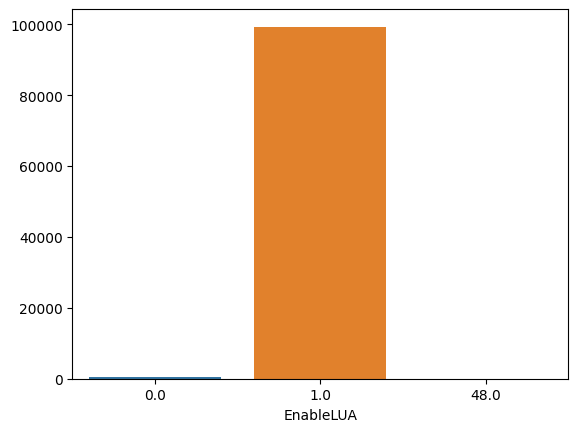

In [90]:
sns.barplot(x=train_df['EnableLUA'].value_counts().index, 
            y=train_df['EnableLUA'].value_counts().values)

**Observation:**
1. There are 19 missing values and 3 unique values in the column.
2. Where 1.0 has the most frequency distribution.

**28. MDC2FormFactor**

In [91]:
# Check Missing values, unique values for MDC2FormFactor
print("Missing Values : ",train_df['MDC2FormFactor'].isna().sum())
print("Unique Values : ",train_df['MDC2FormFactor'].nunique())

Missing Values :  0
Unique Values :  11


In [92]:
train_df['MDC2FormFactor'].value_counts()

MDC2FormFactor
Notebook        64434
Desktop         21580
Convertible      4801
Detachable       3507
AllInOne         3138
PCOther          1274
LargeTablet       704
SmallTablet       351
SmallServer        32
MediumServer       10
LargeServer         4
Name: count, dtype: int64

<Axes: xlabel='MDC2FormFactor'>

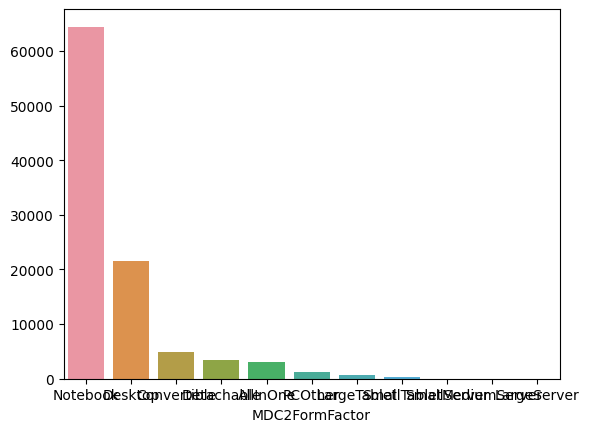

In [93]:
sns.barplot(x=train_df['MDC2FormFactor'].value_counts().index,
           y=train_df['MDC2FormFactor'].value_counts().values)

**Observation:**
1. There are 11 unique values in the data column.
2. Notebook has the hih

**29. DeviceFamily**

In [94]:
# Check Missing values, unique values for DeviceFamily
print("Missing Values : ",train_df['DeviceFamily'].isna().sum())
print("Unique Values : ",train_df['DeviceFamily'].nunique())

Missing Values :  0
Unique Values :  2


In [95]:
train_df['DeviceFamily'].value_counts()

DeviceFamily
Windows.Desktop    99806
Windows.Server        29
Name: count, dtype: int64

<Axes: xlabel='DeviceFamily'>

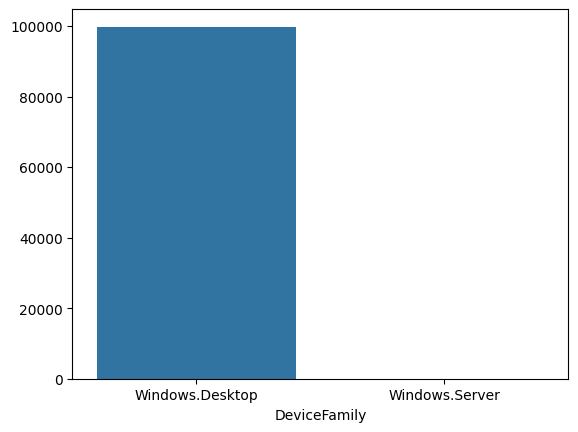

In [96]:
sns.barplot(x=train_df['DeviceFamily'].value_counts().index, 
            y=train_df['DeviceFamily'].value_counts().values)

**Observation**
1. There are 2 unique values in the column.
2. Windows.Desktop has the most frequency.

**30. OEMNameID**

In [97]:
# Check Missing values, unique values for OEMNameID
print("Missing Values : ",train_df['OEMNameID'].isna().sum())
print("Unique Values : ",train_df['OEMNameID'].nunique())

Missing Values :  212
Unique Values :  837


<Axes: xlabel='OEMNameID', ylabel='Density'>

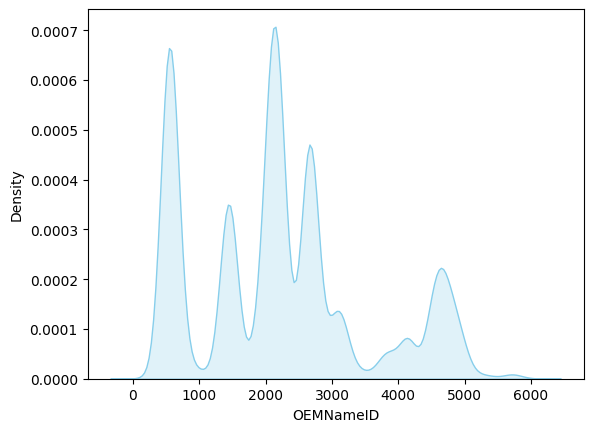

In [98]:
sns.kdeplot(train_df['OEMNameID'], color='skyblue', fill=True)

**Observation:**
1. There are 212 missing values and 837 unique values in the data column.
2. Bin 2000-3000 has the highest frequency.

**31. OEMModelID**

In [99]:
# Check missing values, unique values for OEMModelID
print("Missing Values : ",train_df['OEMModelID'].isna().sum())
print("Unique Values : ",train_df['OEMModelID'].nunique())

Missing Values :  228
Unique Values :  15952


<Axes: xlabel='OEMModelID', ylabel='Density'>

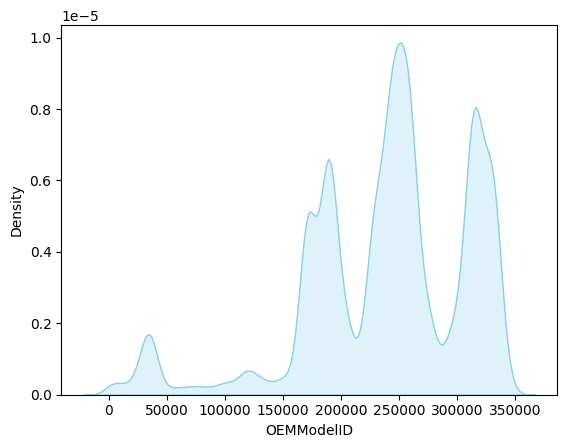

In [100]:
sns.kdeplot(train_df['OEMModelID'], color='skyblue', fill=True)

**Observation:**
1. There are 228 missing values and 15952 unique values in the data column.
2. Bin 25000-30000 has the highest frequency.
3. Some bins have more frequency count than others.
4. The data distribution is left-skewed.

**32. ProcessorCoreCount**

In [101]:
# Check missing values, unique values for ProcessorCoreCount
print("Missing Values : ",train_df['ProcessorCoreCount'].isna().sum())
print("Unique Values : ",train_df['ProcessorCoreCount'].nunique())

Missing Values :  85
Unique Values :  19


In [102]:
train_df['ProcessorCoreCount'].value_counts()

ProcessorCoreCount
4.0     61942
2.0     25257
8.0      9809
12.0     1039
6.0       789
1.0       530
16.0      201
3.0       106
32.0       21
20.0       19
24.0       15
28.0        7
40.0        4
36.0        4
10.0        2
48.0        2
64.0        1
5.0         1
56.0        1
Name: count, dtype: int64

<Axes: xlabel='ProcessorCoreCount'>

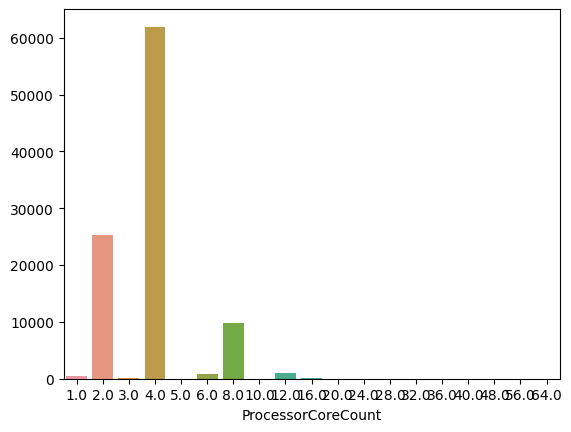

In [103]:
sns.barplot(x=train_df['ProcessorCoreCount'].value_counts().index, 
            y=train_df['ProcessorCoreCount'].value_counts().values)

**Observation:**
1. There are 85 missing values and 19 unique values in the column.
2. 4.0 has highest frequency than others.

**33. ProcessorManufacturerID**

In [104]:
# Check missing values, unique values for ProcessorManufacturerID
print("Missing Values : ",train_df['ProcessorManufacturerID'].isna().sum())
print("Unique Values : ",train_df['ProcessorManufacturerID'].nunique())

Missing Values :  85
Unique Values :  4


In [105]:
train_df['ProcessorManufacturerID'].value_counts()

ProcessorManufacturerID
5.0     88035
1.0     11707
10.0        5
3.0         3
Name: count, dtype: int64

<Axes: xlabel='ProcessorManufacturerID'>

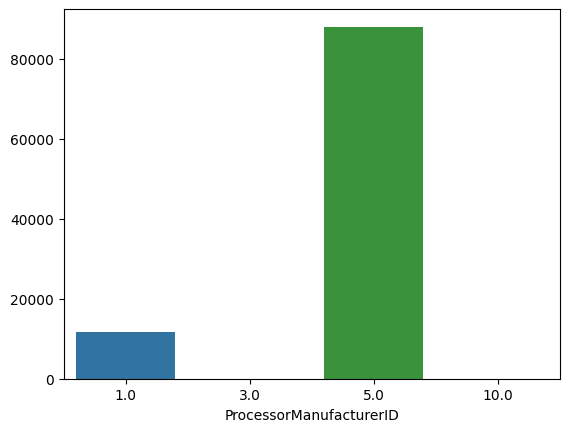

In [106]:
sns.barplot(x=train_df['ProcessorManufacturerID'].value_counts().index, 
            y=train_df['ProcessorManufacturerID'].value_counts().values)

**Observation:**
1. There are 85 missing values and 4 unique values in the column.
2. 5.0 has the highest frequency than others.

**34. ProcessorModelID**

In [107]:
# Check missing values, unique values for ProcessorModelID
print("Missing Values : ", train_df['ProcessorModelID'].isna().sum())
print("Unique Values : ",train_df['ProcessorModelID'].nunique())

Missing Values :  85
Unique Values :  1659


<Axes: xlabel='ProcessorModelID', ylabel='Density'>

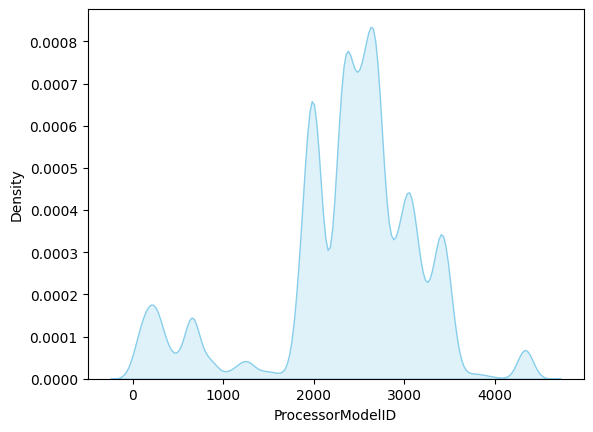

In [108]:
sns.kdeplot(train_df['ProcessorModelID'], color='skyblue', fill=True)

**Observation:**
1. There are 85 missing values and 1659 unique values in the column.
2. 2000-3000 has the highest frequency.
3. The data distribution is slightly left skewed.

**35. PrimaryDiskType**

In [109]:
# Check missing values, unique values for for PrimaryDiskType
print("Missing Values : ",train_df['PrimaryDiskType'].isna().sum())
print("Unique Values : ",train_df['PrimaryDiskType'].nunique())

Missing Values :  23
Unique Values :  4


<Axes: xlabel='PrimaryDiskType'>

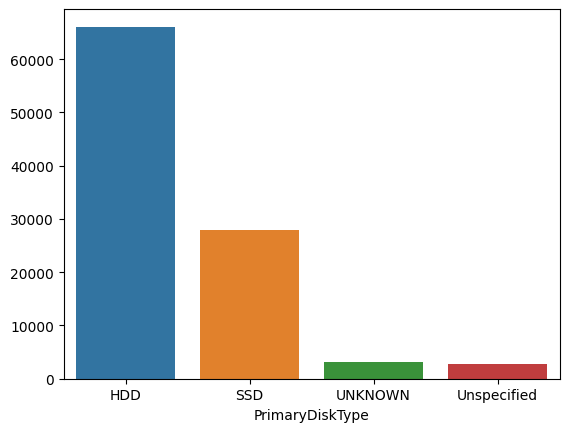

In [110]:
sns.barplot(x=train_df['PrimaryDiskType'].value_counts().index, 
            y=train_df['PrimaryDiskType'].value_counts().values)

**Observation:**
1. There are 23 missing values and 4 unique values in the column.
2. HDD has the highest frequency.

**36. PrimaryDiskCapacity**

In [111]:
# Check missing values, unique values for for PrimaryDiskCapacityMB
print("Missing Values : ",train_df['PrimaryDiskCapacityMB'].isna().sum())
print("Unique Values : ",train_df['PrimaryDiskCapacityMB'].nunique())

Missing Values :  110
Unique Values :  398


<Axes: xlabel='PrimaryDiskCapacityMB', ylabel='Density'>

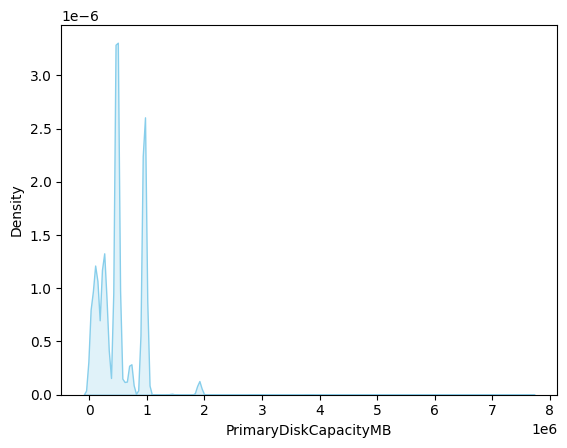

In [112]:
sns.kdeplot(train_df['PrimaryDiskCapacityMB'], color='skyblue', fill=True)

**Observation:**
1. There are 100 missing values and 398 unique values in the column.
2. The data distribution is right-skewed distribution.
3. Where bin 0-1 have the highest frequency.

**37. SystemVolumeCapacityMB**

In [113]:
# Check missing values, unique values for for SystemVolumeCapacityMB
print("Missing Values : ",train_df['SystemVolumeCapacityMB'].isna().sum())
print("Unique Values : ",train_df['SystemVolumeCapacityMB'].nunique())

Missing Values :  110
Unique Values :  46188


<Axes: xlabel='SystemVolumeCapacityMB', ylabel='Density'>

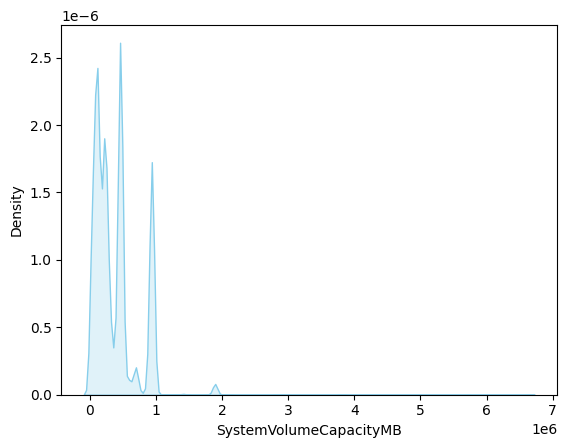

In [114]:
sns.kdeplot(train_df['SystemVolumeCapacityMB'], color='skyblue', fill=True)

**Observation:**
1. There are 110 missing value and 46188 unique values in the column.
2. The data distribution is right skewed distribution.

**38. HasOpticalDiskDrive**

In [115]:
# Check missing values, unique values for for HasOpticalDiskDrive
print("Missing Values : ",train_df['HasOpticalDiskDrive'].isna().sum())
print("Unique Values : ", train_df['HasOpticalDiskDrive'].nunique())

Missing Values :  0
Unique Values :  2


In [116]:
train_df['HasOpticalDiskDrive'].value_counts()

HasOpticalDiskDrive
0    91710
1     8125
Name: count, dtype: int64

<Axes: xlabel='HasOpticalDiskDrive'>

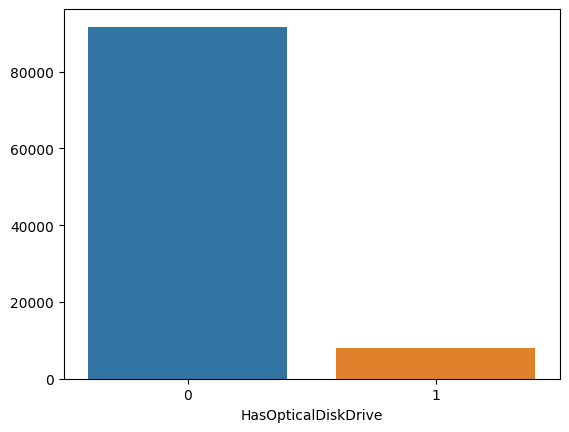

In [117]:
sns.barplot(x=train_df['HasOpticalDiskDrive'].value_counts().index, 
            y=train_df['HasOpticalDiskDrive'].value_counts().values)

**Observation:**
1. There are 2 unique values in the data column.
2. 0 has the highest frequency in the column.


**39. TotalPhysicalRAMMB**

In [118]:
# Check missing values, unique values for for TotalPhysicalRAMMB
print("Missing Values : ",train_df['TotalPhysicalRAMMB'].isna().sum())
print("Unique Values : ",train_df['TotalPhysicalRAMMB'].nunique())

Missing Values :  151
Unique Values :  127


<Axes: xlabel='TotalPhysicalRAMMB', ylabel='Density'>

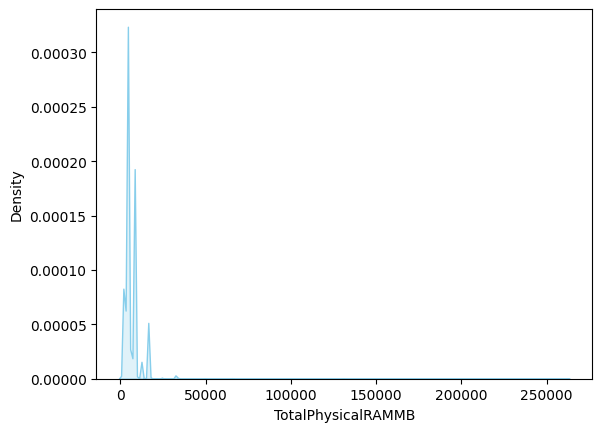

In [119]:
sns.kdeplot(train_df['TotalPhysicalRAMMB'], color='skyblue', fill=True)

**Observation:**
1. There are 151 missing values and 127 unique alues in the data column.
2. First bin has the highest frequency.
3. The data distribution is right skewed distribution.

**40. ChassisType**

In [120]:
# Check missing values, unique values for for ChassisType
print("Missing Values : ",train_df['ChassisType'].isna().sum())
print("Unique Values : ",train_df['ChassisType'].nunique())

Missing Values :  2
Unique Values :  28


In [121]:
train_df['ChassisType'].value_counts()

ChassisType
Notebook               59363
Desktop                20787
Laptop                  7804
Portable                4113
AllinOne                2262
Convertible              965
MiniTower                951
Detachable               611
LowProfileDesktop        557
Other                    535
HandHeld                 523
UNKNOWN                  453
SpaceSaving              324
Tablet                   161
Tower                    128
MainServerChassis        111
Unknown                   59
LunchBox                  39
MiniPC                    34
RackMountChassis          17
BusExpansionChassis       13
SubNotebook               11
0                          4
30                         4
CompactPCI                 1
SubChassis                 1
MultisystemChassis         1
35                         1
Name: count, dtype: int64

<Axes: xlabel='IsPassiveModeEnabled', ylabel='Density'>

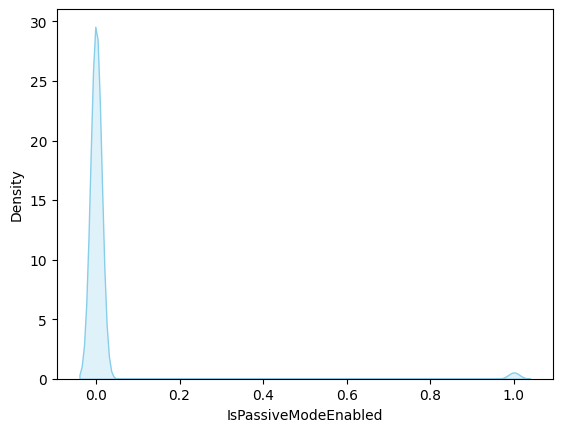

In [122]:
sns.kdeplot(train_df['IsPassiveModeEnabled'], color='skyblue', fill=True)

**Observation:**
1. There are 2 missing values and 28 unique values in the column.
2. The data distribution is right skewed distribution.

**41. PrimaryDisplayDiagonalInches**

In [123]:
# Check missing values, unique values for for PrimaryDisplayDiagonalInches
print("Missing Values : ",train_df['PrimaryDisplayDiagonalInches'].isna().sum())
print("Unique Values : ",train_df['PrimaryDisplayDiagonalInches'].nunique())

Missing Values :  72
Unique Values :  362


<Axes: xlabel='PrimaryDisplayDiagonalInches', ylabel='Density'>

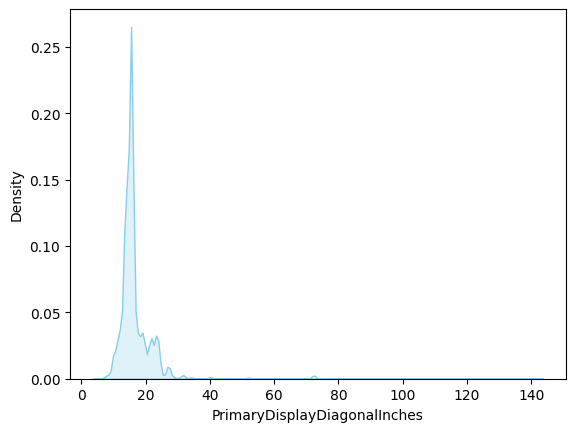

In [124]:
sns.kdeplot(train_df['PrimaryDisplayDiagonalInches'], color='skyblue', fill=True)

**Observation:**
1. There are 72 missing values and 362 unique values in the data column.
2. The data distribution is right skewed.

**42. PrimaryDisplayResolutionHorizontal**

In [125]:
# Check missing values, unique values for for PrimaryDisplayResolutionHorizontal
print("Missing Values : ",train_df['PrimaryDisplayResolutionHorizontal'].isna().sum())
print("Unique Values : ",train_df['PrimaryDisplayResolutionHorizontal'].nunique())

Missing Values :  72
Unique Values :  121


<Axes: xlabel='PrimaryDisplayResolutionHorizontal', ylabel='Density'>

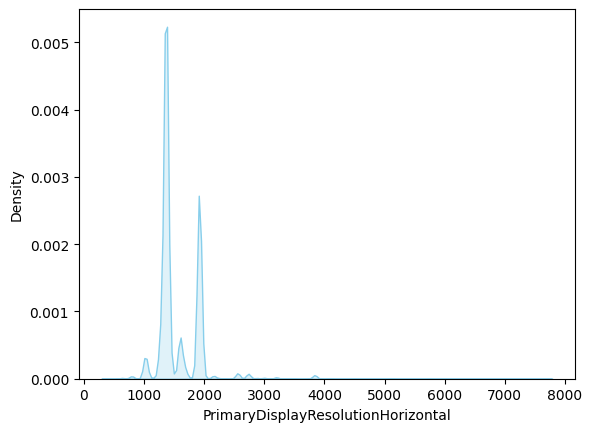

In [126]:
sns.kdeplot(train_df['PrimaryDisplayResolutionHorizontal'], color='skyblue', fill=True)

**Observation:**
1. There are 72 missing values and 121 unique values in the columns.
2. The data distribution is right-skewed.

**43. PrimaryDisplayResolutionVertical**

In [127]:
# Check missing values, unique values for for PrimaryDisplayResolutionVertical
print("Missing Values : ",train_df['PrimaryDisplayResolutionVertical'].isna().sum())
print("Unique Values : ", train_df['PrimaryDisplayResolutionVertical'].nunique())

Missing Values :  72
Unique Values :  131


<Axes: xlabel='PrimaryDisplayResolutionVertical', ylabel='Density'>

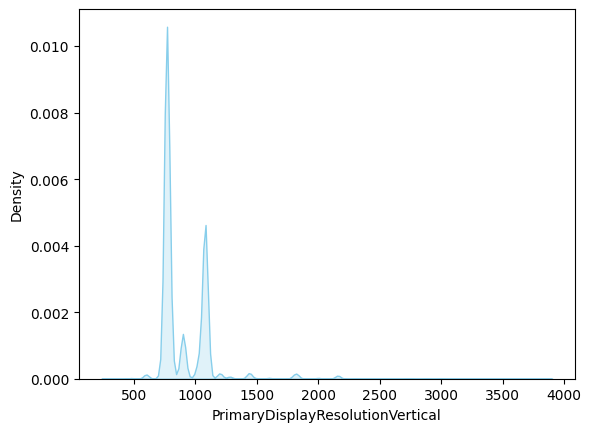

In [128]:
sns.kdeplot(train_df['PrimaryDisplayResolutionVertical'], color='skyblue', fill=True)

**44. PowerPlatformRole**

In [129]:
# Check missing values, unique values for for PowerPlatformRole
print("Missing Values : ",train_df['PowerPlatformRole'].isna().sum())
print("Unique Values : ",train_df['PowerPlatformRole'].nunique())

Missing Values :  0
Unique Values :  9


<Axes: xlabel='PowerPlatformRole'>

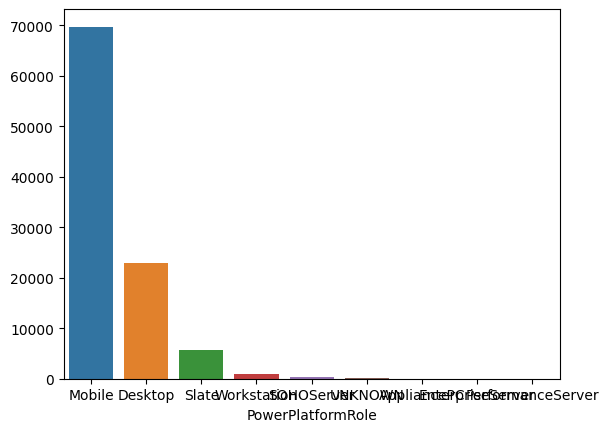

In [130]:
sns.barplot(x=train_df['PowerPlatformRole'].value_counts().index, 
            y=train_df['PowerPlatformRole'].value_counts().values)

**Observation:**
1. There are 9 unique values in the data column.
2. Mobile has the highest frequency among all of others.

**45. InternalBatteryNumberOfCharges**

In [131]:
# Check missing and unique values for for InternalBatteryNumberOfCharges
print("Missing Values : ",train_df['InternalBatteryNumberOfCharges'].isna().sum())
print("Unique Values : ",train_df['InternalBatteryNumberOfCharges'].nunique())

Missing Values :  515
Unique Values :  1760


<Axes: xlabel='InternalBatteryNumberOfCharges', ylabel='Density'>

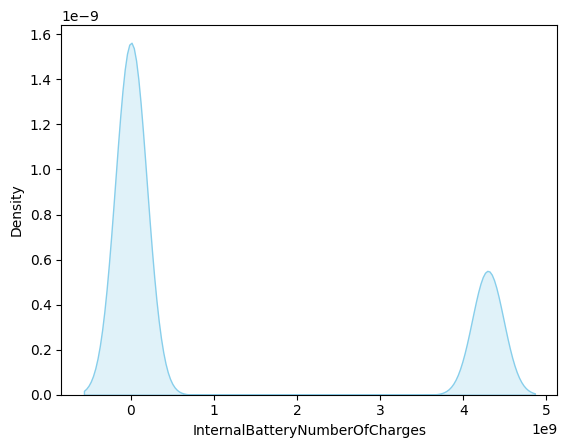

In [132]:
sns.kdeplot(train_df['InternalBatteryNumberOfCharges'], color='skyblue', fill=True)

**Observation:**
1. There are 515 missing values and 1760 unique values in the column.
2. Chart shows that the data only lies around the 0 and 4 only.

**46. NumericOSVersion**

In [133]:
# Check missing and unique values for for NumericOSVersion
print("Missing Values : ",train_df['NumericOSVersion'].isna().sum())
print("Unique Values : ",train_df['NumericOSVersion'].nunique())

Missing Values :  0
Unique Values :  221


In [134]:
train_df['NumericOSVersion'].value_counts()[:20]

NumericOSVersion
10.0.17134.228      17042
10.0.17134.165      11195
10.0.16299.431       6616
10.0.17134.285       5247
10.0.16299.547       4218
10.0.16299.371       4076
10.0.17134.112       3867
10.0.17134.191       2696
10.0.16299.611       2585
10.0.14393.2189      2560
10.0.16299.125       2515
10.0.10240.17443     2440
10.0.10586.1176      2033
10.0.16299.492       1994
10.0.16299.309       1812
10.0.15063.1206      1230
10.0.17134.286       1189
10.0.17134.254       1170
10.0.16299.192       1149
10.0.15063.1266      1143
Name: count, dtype: int64

<Axes: xlabel='NumericOSVersion'>

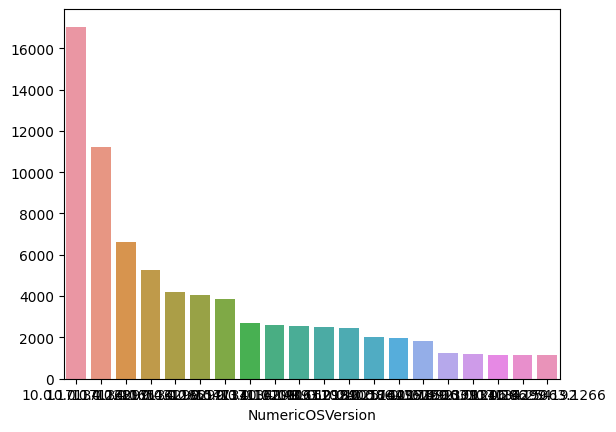

In [135]:
# Bar chart of Top NumericOSVersion
top_numeric_os_version = train_df['NumericOSVersion'].value_counts().nlargest(20)

sns.barplot(x=top_numeric_os_version.index, 
            y=top_numeric_os_version.values)

**Observation:**
1. There are 221 unique values in the column.
2. Some column has highest frequency among all of others.

**47. OSArchitecture**

In [136]:
# Check missing values, unique values for OSArchitecture
print("Missing Values : ",train_df['OSArchitecture'].isna().sum())
print("Unique Values : ",train_df['OSArchitecture'].nunique())

Missing Values :  0
Unique Values :  3


In [137]:
train_df['OSArchitecture'].value_counts()

OSArchitecture
amd64    91129
x86       8701
arm64        5
Name: count, dtype: int64

<Axes: xlabel='OSArchitecture'>

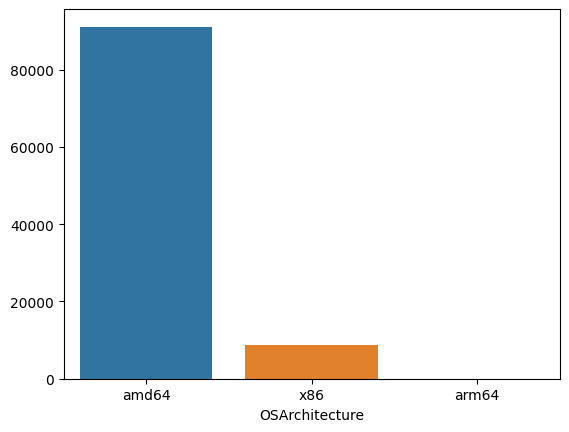

In [138]:
sns.barplot(x=train_df['OSArchitecture'].value_counts().index, 
            y=train_df['OSArchitecture'].value_counts().values)

**Observation:**
1. There are 3 unique values in the column.
2. amd64 has the highest frequency among others.

**48. OSBranch**

In [139]:
# Check missing values, unique values for OSBranch
print("Missing Values : ",train_df['OSBranch'].isna().sum())
print("Unique Values : ",train_df['OSBranch'].nunique())

Missing Values :  0
Unique Values :  13


In [140]:
train_df['OSBranch'].value_counts()

OSBranch
rs4_release                  46838
rs3_release_svc_escrow       14490
rs3_release                  14316
rs2_release                   8514
rs1_release                   7766
th2_release_sec               2909
th1_st1                       2294
th2_release                   1631
th1                            823
rs5_release                    145
rs3_release_svc_escrow_im       78
rs_prerelease_flt               26
rs_prerelease                    5
Name: count, dtype: int64

<Axes: xlabel='OSBranch'>

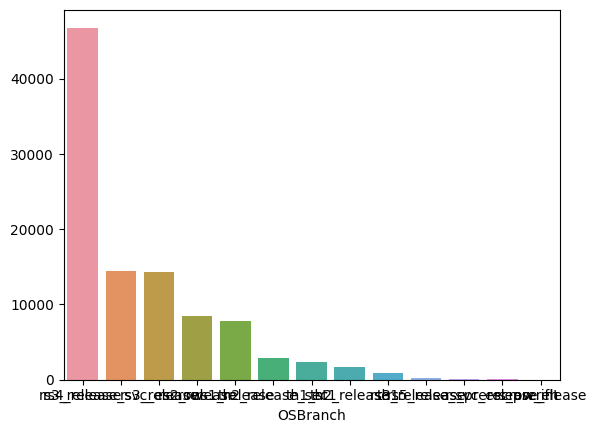

In [141]:
sns.barplot(x=train_df['OSBranch'].value_counts().index, 
            y=train_df['OSBranch'].value_counts().values)

**Observation:**
1. There are 13 unique values in the column.
2. rs4_release has almost 50% of the frequency.

**49. OSBuildNumberOnly**

In [142]:
# Check missing values, unique values for OSBuildNumberOnly
print("Missing Values : ",train_df['OSBuildNumberOnly'].isna().sum())
print("Unique Values : ",train_df['OSBuildNumberOnly'].nunique())

Missing Values :  0
Unique Values :  23


In [143]:
train_df['OSBuildNumberOnly'].value_counts()

OSBuildNumberOnly
17134    46837
16299    28884
15063     8513
14393     7766
10586     4540
10240     3117
17738       27
17744       27
17692       26
17746       17
17735       14
17741       13
17758       13
17760        8
17763        7
17755        7
17754        6
17751        5
17672        4
17723        1
15060        1
17133        1
17686        1
Name: count, dtype: int64

<Axes: xlabel='OSBuildNumberOnly', ylabel='Density'>

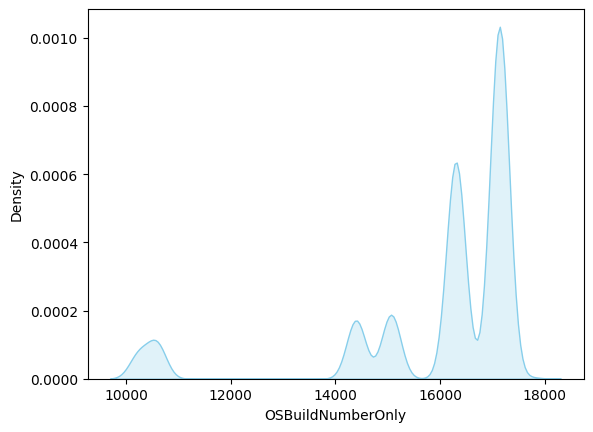

In [144]:
sns.kdeplot(train_df['OSBuildNumberOnly'], color='skyblue', fill=True)

**Observation:**
1. There are 23 unique values in the column.
2. The data distribution is left-skewed.
3. Some bins have more frequency than others.

**50. OSBuildRevisionOnly**

In [145]:
# Check missing values, unique values for OSBuildRevisionOnly
print("Missing Values : ",train_df['OSBuildRevisionOnly'].isna().sum())
print("Unique Values : ",train_df['OSBuildRevisionOnly'].nunique())

Missing Values :  0
Unique Values :  199


<Axes: xlabel='OSBuildRevisionOnly', ylabel='Density'>

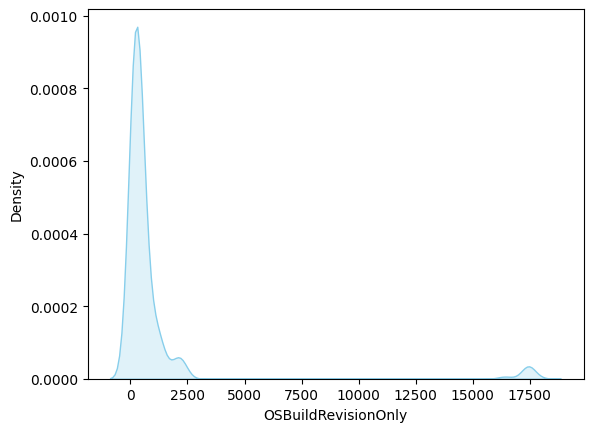

In [146]:
sns.kdeplot(train_df['OSBuildRevisionOnly'], color='skyblue', fill=True)

**Observation:**
1. There are 199 unique values in the column.
2. Bin 0-3000 have almost 85% of the frequency.

**51. OSEdition**

In [147]:
# Check missing values, unique values for OSEdition
print("Missing Values : ",train_df['OSEdition'].isna().sum())
print("Unique Values : ",train_df['OSEdition'].nunique())

Missing Values :  0
Unique Values :  20


In [148]:
train_df['OSEdition'].value_counts()

OSEdition
Core                       39210
Professional               34545
CoreSingleLanguage         21968
CoreCountrySpecific         1820
ProfessionalEducation        703
Education                    495
Enterprise                   390
ProfessionalN                289
EnterpriseS                  238
Cloud                         67
CoreN                         49
ServerStandard                21
EnterpriseSN                  13
EducationN                    11
ServerStandardEval             5
ProfessionalEducationN         3
EnterpriseN                    3
ServerSolution                 2
ProfessionalWorkstation        2
ServerDatacenterEval           1
Name: count, dtype: int64

<Axes: xlabel='OSEdition', ylabel='Count'>

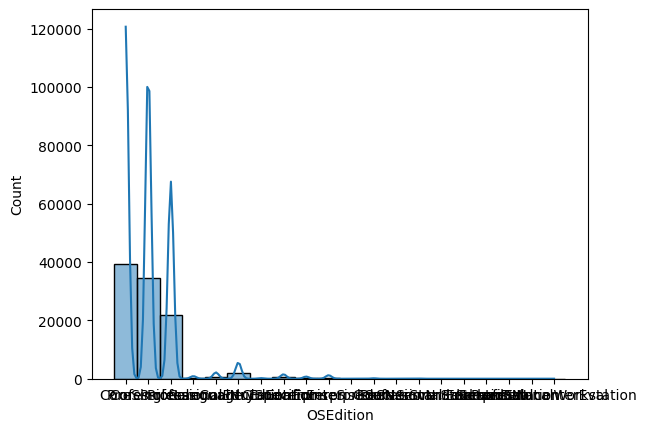

In [149]:
sns.histplot(train_df['OSEdition'], bins=10, kde=True)

**Observation:**
1. There are 20 unique values in the OSEdition column.
2. The data distribution is right-skewed.

**52. OSSkuFriendlyName**

In [150]:
# Check missing values, unique values for OSSkuFriendlyName
print("Missing Values : ",train_df['OSSkuFriendlyName'].isna().sum())
print("Unique Values : ",train_df['OSSkuFriendlyName'].nunique())

Missing Values :  0
Unique Values :  18


In [151]:
train_df['OSSkuFriendlyName'].value_counts()

OSSkuFriendlyName
CORE                            39208
PROFESSIONAL                    35255
CORE_SINGLELANGUAGE             21966
CORE_COUNTRYSPECIFIC             1817
EDUCATION                         495
ENTERPRISE                        391
PROFESSIONAL_N                    294
ENTERPRISE_S                      238
CLOUD                              66
CORE_N                             48
STANDARD_SERVER                    21
ENTERPRISE_S_N                     13
EDUCATION_N                        11
STANDARD_EVALUATION_SERVER          5
ENTERPRISE_N                        2
SB_SOLUTION_SERVER                  2
PRO_WORKSTATION                     2
DATACENTER_EVALUATION_SERVER        1
Name: count, dtype: int64

<Axes: xlabel='OSSkuFriendlyName', ylabel='Count'>

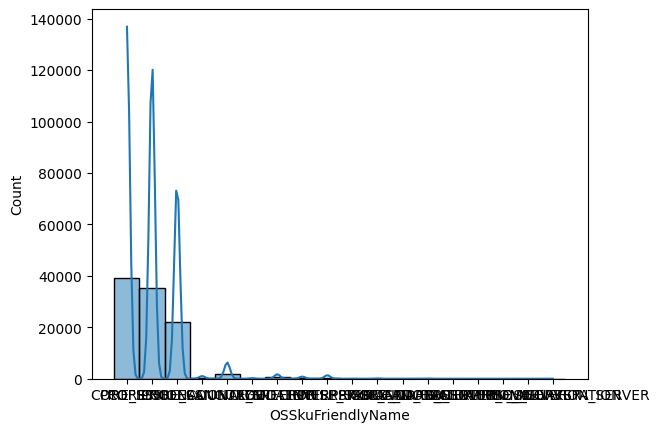

In [152]:
sns.histplot(train_df['OSSkuFriendlyName'], bins=10, kde=True)

**Observation:**
1. There are 18 unique values in the OSSkuFriendlyName column.
2. The data distribution is right-skewed.

**53. OSInstallType**

In [153]:
# Check missing values, unique values for OSInstallType
print("Missing Values : ",train_df['OSInstallType'].isna().sum())
print("Unique Values : ",train_df['OSInstallType'].nunique())

Missing Values :  0
Unique Values :  9


In [154]:
train_df['OSInstallType'].value_counts()

OSInstallType
UUPUpgrade        31977
Update            17090
IBSClean          16574
Upgrade           14541
Other              8912
Reset              7135
Refresh            2207
Clean               797
CleanPCRefresh      602
Name: count, dtype: int64

<Axes: xlabel='OSInstallType'>

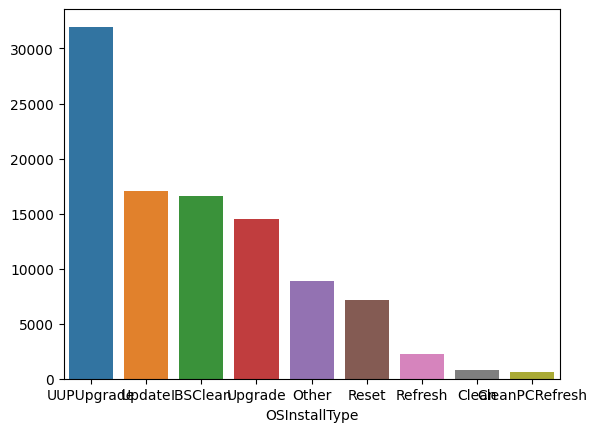

In [155]:
sns.barplot(x=train_df['OSInstallType'].value_counts().index, 
            y=train_df['OSInstallType'].value_counts().values)

**Observation:**
1. There are 9 unique values in the column.
2. UUPUpgrade has the highest frequency among others.

**54. OSInstallLanguageID**

In [156]:
# Check missing values, unique values for OSInstallLanguageID
print("Missing Values : ",train_df['OSInstallLanguageID'].isna().sum())
print("Unique Values : ",train_df['OSInstallLanguageID'].nunique())

Missing Values :  113
Unique Values :  39


<Axes: xlabel='OSInstallLanguageID', ylabel='Density'>

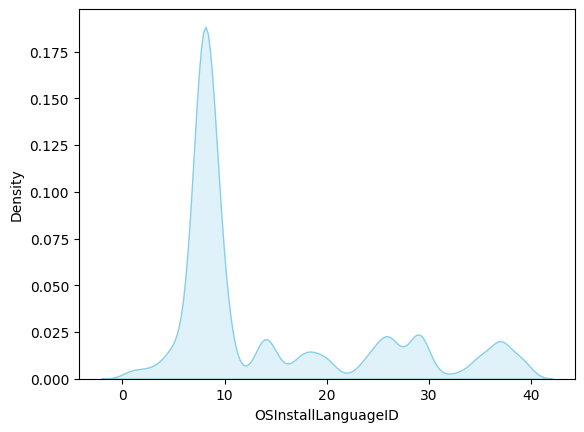

In [157]:
sns.kdeplot(train_df['OSInstallLanguageID'], color='skyblue', fill=True)

**Observation:**
1. There are 113 missing values and 39 unique values in the column.
2. The data distribution is right-skewed where bin 5-10 has the highest frequency.

**55. OSUILocaleID**

In [158]:
# Check missing values, unique values for OSUILocaleID
print("Missing Values : ",train_df['OSUILocaleID'].isna().sum())
print("Unique Values : ",train_df['OSUILocaleID'].nunique())

Missing Values :  0
Unique Values :  64


<Axes: xlabel='OSUILocaleID', ylabel='Density'>

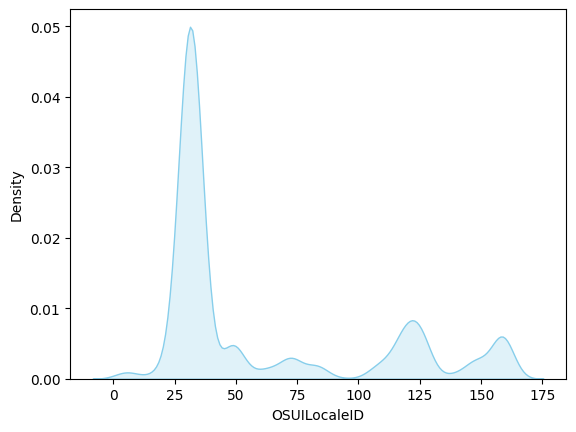

In [159]:
sns.kdeplot(train_df['OSUILocaleID'], color='skyblue', fill=True)

**Observation:**
1. There are 64 unique values in the column.
2. The data distribution is right-skewed.
3. bin 20-40 has the highest frequency.

**56. AutoUpdateOptionsName**

In [160]:
# Check missing values, unique values for AutoUpdateOptionsName
print("Missing Values : ",train_df['AutoUpdateOptionsName'].isna().sum())
print("Unique Values : ",train_df['AutoUpdateOptionsName'].nunique())

Missing Values :  0
Unique Values :  6


In [161]:
train_df['AutoUpdateOptionsName'].value_counts()

AutoUpdateOptionsName
FullAuto                                 45088
UNKNOWN                                  26256
Notify                                   23700
AutoInstallAndRebootAtMaintenanceTime     4435
Off                                        327
DownloadNotify                              29
Name: count, dtype: int64

<Axes: xlabel='AutoUpdateOptionsName'>

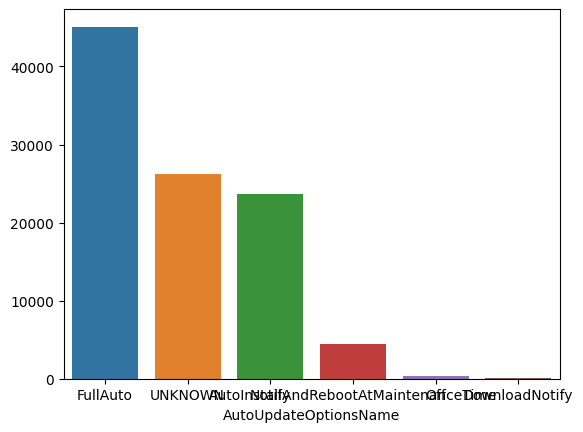

In [162]:
sns.barplot(x=train_df['AutoUpdateOptionsName'].value_counts().index, 
            y=train_df['AutoUpdateOptionsName'].value_counts().values)

**Observation:**
1. There are 6 unique values in the column.
2. FullAuto has the highest frequency.

**57. IsPortableOS**

In [163]:
# Check missing values, unique values for IsPortableOS
print("Missing Values : ",train_df['IsPortableOS'].isna().sum())
print("Unique Values : ",train_df['IsPortableOS'].nunique())

Missing Values :  0
Unique Values :  2


In [164]:
train_df['IsPortableOS'].value_counts()

IsPortableOS
0    99784
1       51
Name: count, dtype: int64

<Axes: xlabel='IsPortableOS'>

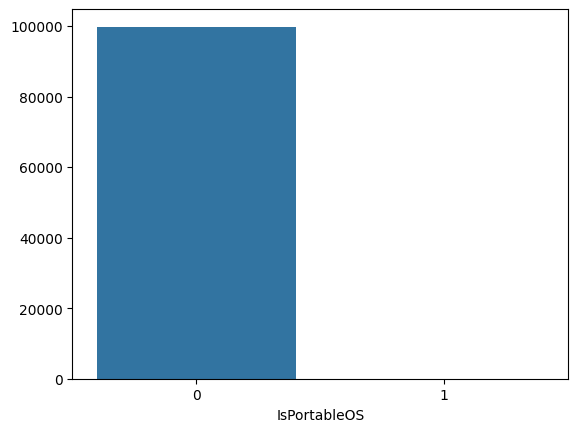

In [165]:
sns.barplot(x=train_df['IsPortableOS'].value_counts().index, 
            y=train_df['IsPortableOS'].value_counts().values)

**Observation:**
1. There are 2 unique values in the column.
2. The data distribution is binary.
3. 0 has very high frequency than 1.

**58. OSGenuineState**

In [166]:
# Check missing values, unique values for OSGenuineState
print("Missing Values : ",train_df['OSGenuineState'].isna().sum())
print("Unique Values : ",train_df['OSGenuineState'].nunique())

Missing Values :  0
Unique Values :  4


In [167]:
train_df['OSGenuineState'].value_counts()

OSGenuineState
IS_GENUINE         89714
INVALID_LICENSE     8425
OFFLINE             1581
UNKNOWN              115
Name: count, dtype: int64

<Axes: xlabel='OSGenuineState'>

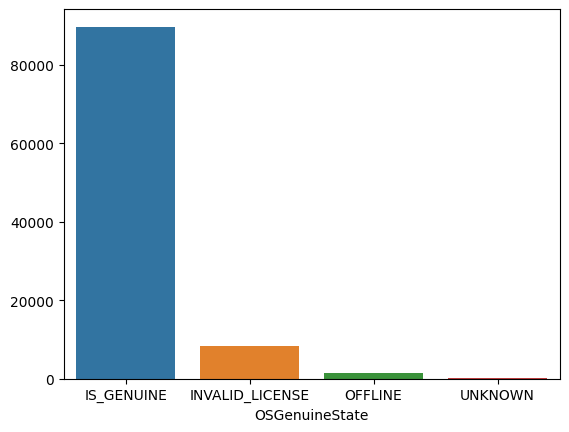

In [168]:
sns.barplot(x=train_df['OSGenuineState'].value_counts().index, 
            y=train_df['OSGenuineState'].value_counts().values)

**Observation:**
1. There are 4 unique values in the column.
2. IS_GENUINE has almost 85% of the frequency distribution.

**59. LicenceActivationChannel**

In [169]:
# Check missing values, unique values for LicenseActivationChannel
print("Missing Values : ",train_df['LicenseActivationChannel'].isna().sum())
print("Unique Values : ",train_df['LicenseActivationChannel'].nunique())

Missing Values :  0
Unique Values :  6


In [170]:
train_df['LicenseActivationChannel'].value_counts()

LicenseActivationChannel
Retail            52100
OEM:DM            39128
Volume:GVLK        4635
OEM:NONSLP         3872
Volume:MAK           94
Retail:TB:Eval        6
Name: count, dtype: int64

<Axes: xlabel='LicenseActivationChannel'>

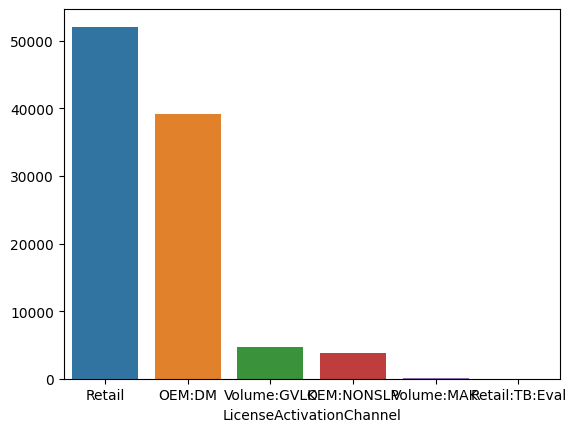

In [171]:
sns.barplot(x=train_df['LicenseActivationChannel'].value_counts().index, 
            y=train_df['LicenseActivationChannel'].value_counts().values)

**Observation:**
1. There are 6 unique values in the column.
2. Retail has almost 50% of the frequency distribution

**60. FlightRing**

In [172]:
# Check missing values, unique values for FlightRing
print("Missing Values : ",train_df['FlightRing'].isna().sum())
print("Unique Values : ",train_df['FlightRing'].nunique())

Missing Values :  0
Unique Values :  7


In [173]:
train_df['FlightRing'].value_counts()

FlightRing
Retail      93997
NOT_SET      3019
Unknown      2486
RP            123
WIF            90
WIS            84
Disabled       36
Name: count, dtype: int64

<Axes: xlabel='FlightRing'>

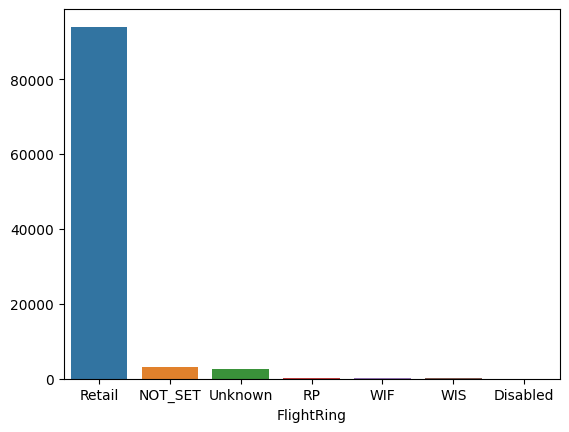

In [174]:
sns.barplot(x=train_df['FlightRing'].value_counts().index, 
            y=train_df['FlightRing'].value_counts().values)

**Observation:**
1. There are 7 unique values in the column.
2. Retail has more frequency than others.

**61. FirmwareManufacturerID**

In [175]:
# Check missing values, unique values for FirmwareManufacturerID
print("Missing Values : ",train_df['FirmwareManufacturerID'].isna().sum())
print("Unique Values : ",train_df['FirmwareManufacturerID'].nunique())

Missing Values :  376
Unique Values :  169


<Axes: xlabel='FirmwareManufacturerID', ylabel='Density'>

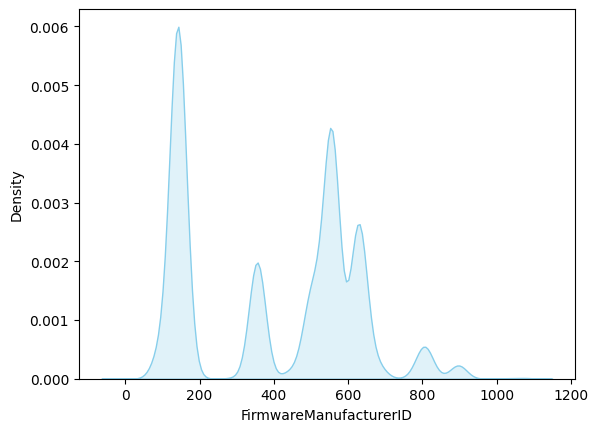

In [176]:
sns.kdeplot(train_df['FirmwareManufacturerID'], color='skyblue', fill=True)

**Observation:**
1. There are 376 missing values and 169 unique values in the column.
2. Some bins have high frequency than others.

**62. FirmwareVersionID**

In [177]:
# Check missing values, unique values for FirmwareVersionID
print("Missing Values : ",train_df['FirmwareVersionID'].isna().sum())
print("Unique Values : ",train_df['FirmwareVersionID'].nunique())

Missing Values :  334
Unique Values :  12299


<Axes: xlabel='FirmwareVersionID', ylabel='Density'>

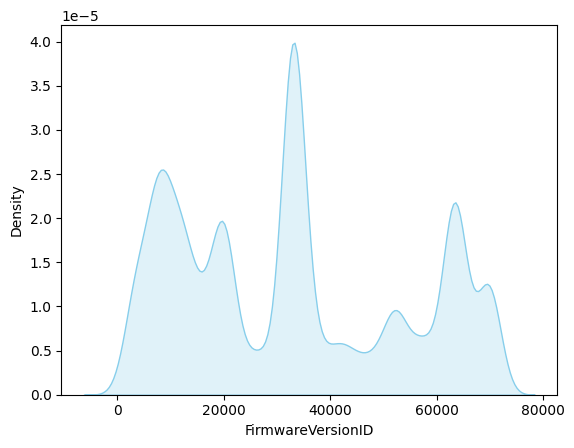

In [178]:
sns.kdeplot(train_df['FirmwareVersionID'], color='skyblue', fill=True)

**Observation:**
1. There are 334 missing values and 12299 unique values in the column.
2. Some bins have more frequency than others.

**63. IsSecureBootEnabled**

In [179]:
# Check missing values, unique values for IsSecureBootEnabled
print("Missing Values : ",train_df['IsSecureBootEnabled'].isna().sum())
print("Unique Values : ",train_df['IsSecureBootEnabled'].nunique())

Missing Values :  0
Unique Values :  2


In [180]:
train_df['IsSecureBootEnabled'].value_counts()

IsSecureBootEnabled
0    50351
1    49484
Name: count, dtype: int64

<Axes: xlabel='IsSecureBootEnabled'>

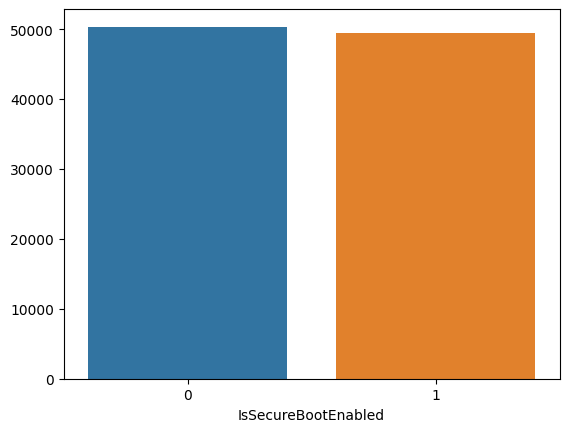

In [181]:
sns.barplot(x=train_df['IsSecureBootEnabled'].value_counts().index, 
            y=train_df['IsSecureBootEnabled'].value_counts().values)

**Observation:**
1. There are 2 unique values in the columns.
2. Both the values have almost the same number of valuecounts.

**64. IsVirtualDevice**

In [182]:
# Check missing values, unique values for IsVirtualDevice
print("Missing Values : ",train_df['IsVirtualDevice'].isna().sum())
print("Unique Values : ",train_df['IsVirtualDevice'].nunique())

Missing Values :  20
Unique Values :  2


In [183]:
train_df['IsVirtualDevice'].value_counts()

IsVirtualDevice
0.0    99431
1.0      384
Name: count, dtype: int64

<Axes: xlabel='IsVirtualDevice'>

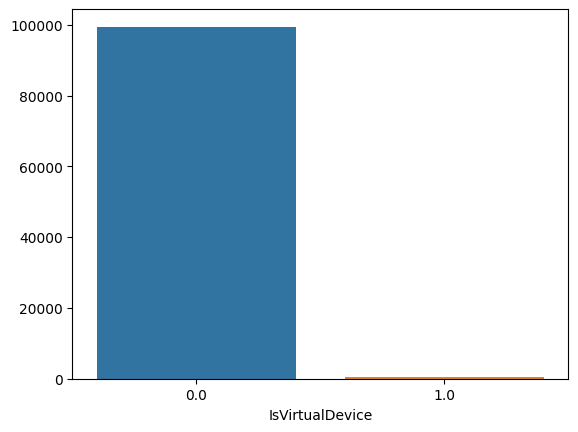

In [184]:
sns.barplot(x=train_df['IsVirtualDevice'].value_counts().index, 
            y=train_df['IsVirtualDevice'].value_counts().values)

**Observation:**
1. There are 20 missing values and 2 unique values in the column.
2. 0.0 has 99431 valuecounts.

**65. IsTouchEnabled**

In [185]:
# Check missing values, unique values for IsTouchEnabled
print("Missing Values : ",train_df['IsTouchEnabled'].isna().sum())
print("Unique Values : ",train_df['IsTouchEnabled'].nunique())

Missing Values :  0
Unique Values :  2


In [186]:
train_df['IsTouchEnabled'].value_counts()

IsTouchEnabled
0    87008
1    12827
Name: count, dtype: int64

<Axes: xlabel='IsTouchEnabled'>

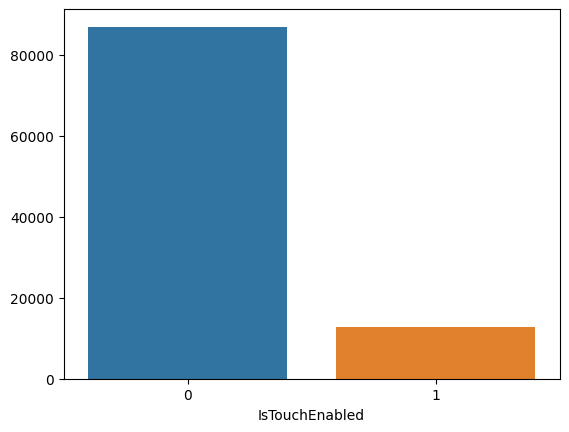

In [187]:
sns.barplot(x=train_df['IsTouchEnabled'].value_counts().index, 
            y=train_df['IsTouchEnabled'].value_counts().values)

**Observation:**
1. There are 2 unique values in the column.
2. 0 has the highest frequency and 1 has the lowest frequency.

**66. IsPenCapable**

In [188]:
# Check missing values, unique values for IsPenCapable
print("Missing Values : ",train_df['IsPenCapable'].isna().sum())
print("Unique Values : ",train_df['IsPenCapable'].nunique())

Missing Values :  0
Unique Values :  2


In [189]:
train_df['IsPenCapable'].value_counts()

IsPenCapable
0    95780
1     4055
Name: count, dtype: int64

<Axes: xlabel='IsPenCapable'>

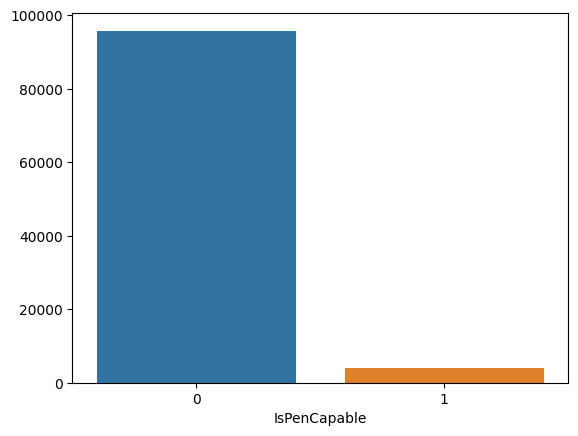

In [190]:
sns.barplot(x=train_df['IsPenCapable'].value_counts().index, 
            y=train_df['IsPenCapable'].value_counts().values)

**Observation:**
1. There are 2 unique values in the column.
2. 0 has highest frequency and 1 has lowest frequency.

**67. IsAlwaysOnAlwaysConnectedCapable**

In [191]:
# Check missing values, unique values for IsAlwaysOnAlwaysConnectedCapable
print("Missing Values : ",train_df['IsAlwaysOnAlwaysConnectedCapable'].isna().sum())
print("Unique Values : ",train_df['IsAlwaysOnAlwaysConnectedCapable'].nunique())

Missing Values :  134
Unique Values :  2


In [192]:
train_df['IsAlwaysOnAlwaysConnectedCapable'].value_counts()

IsAlwaysOnAlwaysConnectedCapable
0.0    93875
1.0     5826
Name: count, dtype: int64

<Axes: xlabel='IsAlwaysOnAlwaysConnectedCapable'>

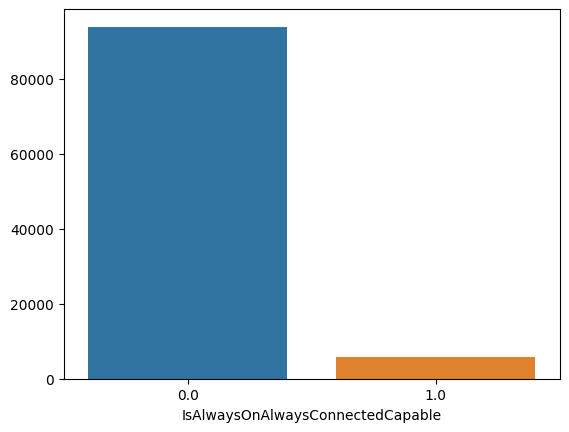

In [193]:
sns.barplot(x=train_df['IsAlwaysOnAlwaysConnectedCapable'].value_counts().index, 
            y=train_df['IsAlwaysOnAlwaysConnectedCapable'].value_counts().values)

**Observation:**
1. There are 134 missing values and 2 unique values in the column.
2. 0 has the highest frequency where as 1 has the lowest frequency.

**68. IsGamer**

In [194]:
# Check missing values, unique values for IsGamer
print("Missing Values : ",train_df['IsGamer'].isna().sum())
print("Unique Values : ",train_df['IsGamer'].nunique())

Missing Values :  559
Unique Values :  2


In [195]:
train_df['IsGamer'].value_counts()

IsGamer
0.0    69816
1.0    29460
Name: count, dtype: int64

<Axes: xlabel='IsGamer'>

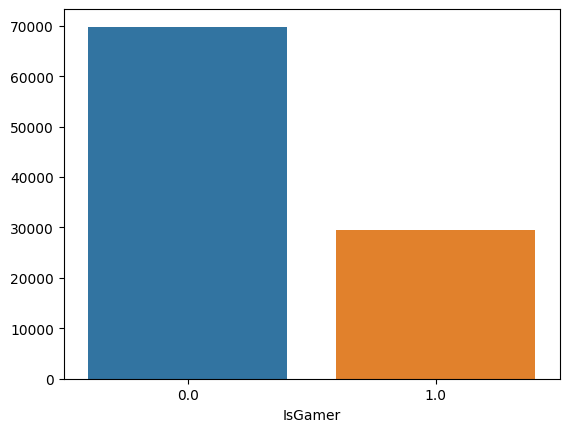

In [196]:
sns.barplot(x=train_df['IsGamer'].value_counts().index, 
            y=train_df['IsGamer'].value_counts().values)

**Observation:**
1. There are 559 missing values and 2 unique values in the column.
2. 0 has the highest frequency and 1 has the lowest frequency.

**69. RegionIdentifier**

In [197]:
# Check missing values, unique values for RegionIdentifier
print("Missing Values : ",train_df['RegionIdentifier'].isna().sum())
print("Unique Values : ",train_df['RegionIdentifier'].nunique())

Missing Values :  559
Unique Values :  15


In [198]:
train_df['RegionIdentifier'].value_counts()

RegionIdentifier
10.0    20592
11.0    15483
3.0     15056
1.0     14233
15.0    11912
7.0      6729
8.0      3292
13.0     2505
5.0      2328
12.0     1855
6.0      1846
4.0      1606
2.0       935
9.0       870
14.0       34
Name: count, dtype: int64

<Axes: xlabel='RegionIdentifier', ylabel='Density'>

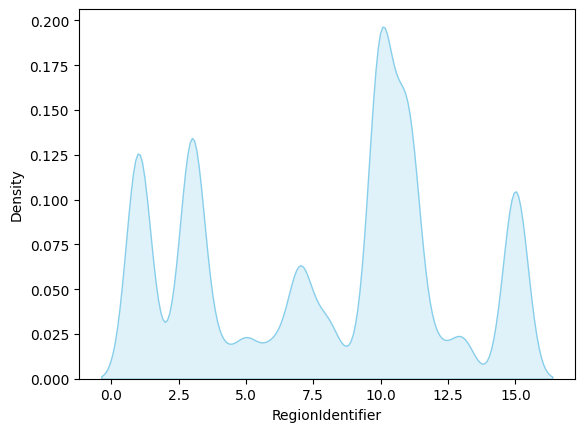

In [199]:
sns.kdeplot(train_df['RegionIdentifier'], color='skyblue', fill=True)

**Observation:**
1. There are 559 missing values and 15 unique values in the column.
2. Chart shows that some bins have more frequency than others.

**70. DateOS**

In [200]:
# Check missing values, unique values for DateOS
print("Missing Values : ",train_df['DateOS'].isna().sum())
print("Unique Values : ",train_df['DateOS'].nunique())

Missing Values :  24
Unique Values :  112


In [201]:
train_df['DateOS'] = pd.to_datetime(train_df['DateOS'])
test_df['DateOS'] = pd.to_datetime(test_df['DateOS'])

In [202]:
train_df['DateOS'].min(), train_df['DateOS'].max()

(Timestamp('2015-07-15 00:00:00'), Timestamp('2018-10-02 00:00:00'))

<Axes: xlabel='DateOS', ylabel='Density'>

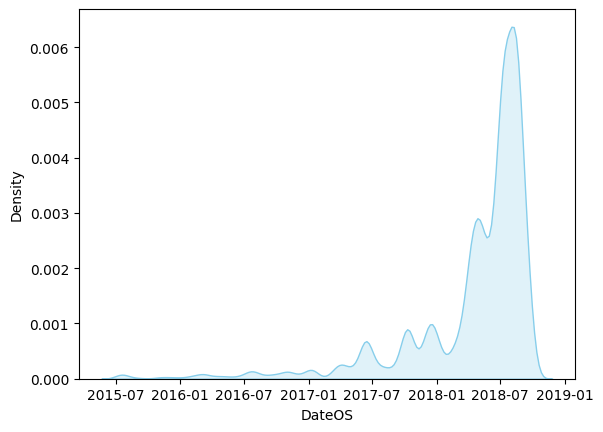

In [203]:
sns.kdeplot(train_df['DateOS'], color='skyblue', fill=True)

**Observation:**
1. There are 24 missing values and 112 unique values in the column.
2. The data distribution is left-skewed.

**71. DateAS**

In [204]:
# Check missing values, unique values for DateOS
print("Missing Values : ",train_df['DateAS'].isna().sum())
print("Unique Values : ",train_df['DateAS'].nunique())

Missing Values :  0
Unique Values :  2695


In [205]:
train_df['DateAS'] = pd.to_datetime(train_df['DateAS'])
test_df['DateAS'] = pd.to_datetime(test_df['DateAS'])

<Axes: xlabel='DateAS', ylabel='Density'>

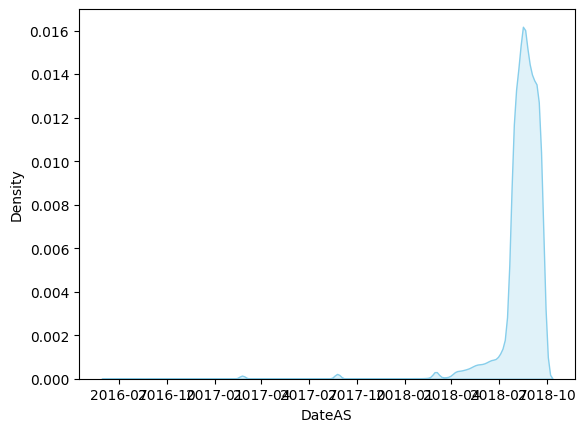

In [206]:
sns.kdeplot(train_df['DateAS'], color='skyblue', fill=True)

**Observation:**
1. There are 2695 unique values in the column.
2. The data distribution is left-skewed.

## **2.3. Perform Bivariate Analysis**

### **2.3.1. Numeric vs Numeric Analysis**

**1. Bivariate Analysis for Hardware Specification**

In [207]:
# Pairplot for Key Features
corr_matrix = train_df[["ProcessorCoreCount", "TotalPhysicalRAMMB", "PrimaryDiskCapacityMB", "SystemVolumeCapacityMB"]].corr()
corr_matrix

,ProcessorCoreCount,TotalPhysicalRAMMB,PrimaryDiskCapacityMB,SystemVolumeCapacityMB
ProcessorCoreCount,1.000000,0.591052,0.095822,0.079568
TotalPhysicalRAMMB,0.591052,1.000000,0.140988,0.157202
PrimaryDiskCapacityMB,0.095822,0.140988,1.000000,0.771097
SystemVolumeCapacityMB,0.079568,0.157202,0.771097,1.000000


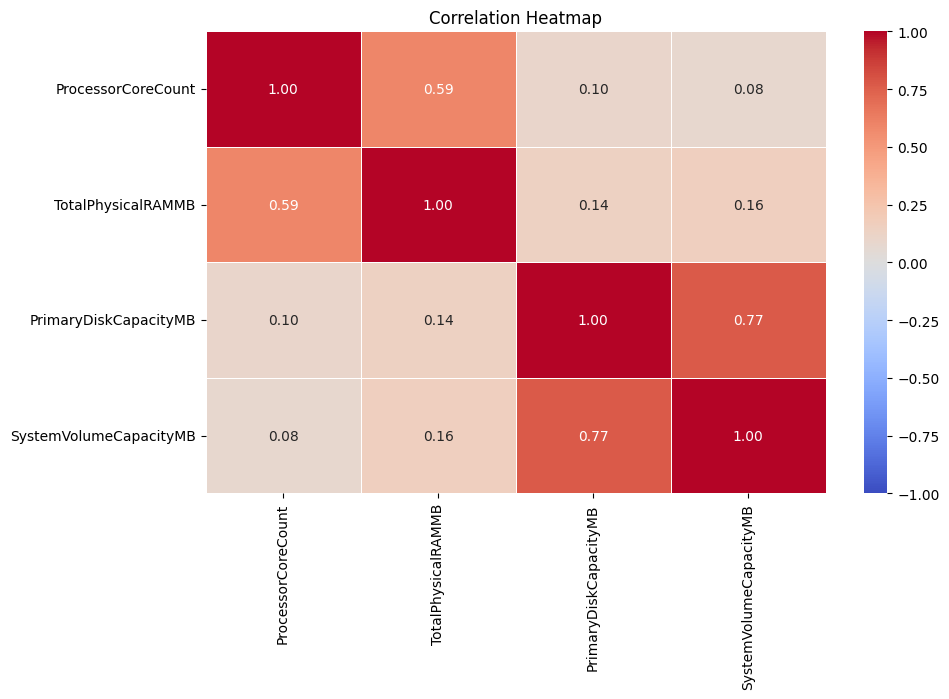

In [208]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5,vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

**Observation:**
1. **ProcessorCoreCount and TotalPhysicalRAMMB** has moderate corelation of 0.591 means more CPU cores tends to be associated with more RAM.
2. **PrimaryDiskCapacity and SystemVolumeCapacityMB** has strong positive corelation of 0.77 means higher disk capcity also have larger system volume.
3. **ProcessorCoreCount and SystemVolumeCapacityMB** has very weak corelation of 0.079 means no. of cores doesnot significantly affect system volume.
4. **TotalPhysicalRAMMB vs PrimaryDiskCapacityMB** has weak corelation of 0.141 means more RAM doesnot necessarily mean higher disk capacity.

**2. Bivariate Analysis between OSBuildNumberOnly and OSBuildRevisionOnly**

In [209]:
corr_matrix = train_df[['OSBuildNumberOnly','OSBuildRevisionOnly']].corr()
corr_matrix

,OSBuildNumberOnly,OSBuildRevisionOnly
OSBuildNumberOnly,1.00000,-0.63838
OSBuildRevisionOnly,-0.63838,1.00000


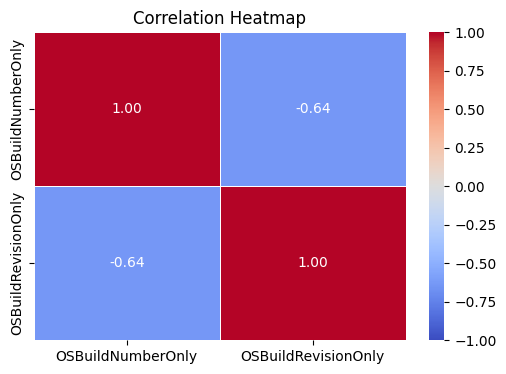

In [210]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5,vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

**Observation:**
1. As OSBuildNumberOnly increases, OSBuildRevisionOnly tends to decrease.
2. This suggests that higher OS build numbers are associated with lower revision numbers (or vice versa).

**3. Bivariate Analysis for Display**

In [211]:
corr_matrix = train_df[['PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionVertical', 'PrimaryDisplayResolutionHorizontal']].corr()
corr_matrix

,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionVertical,PrimaryDisplayResolutionHorizontal
PrimaryDisplayDiagonalInches,1.000000,0.263799,0.316377
PrimaryDisplayResolutionVertical,0.263799,1.000000,0.898154
PrimaryDisplayResolutionHorizontal,0.316377,0.898154,1.000000


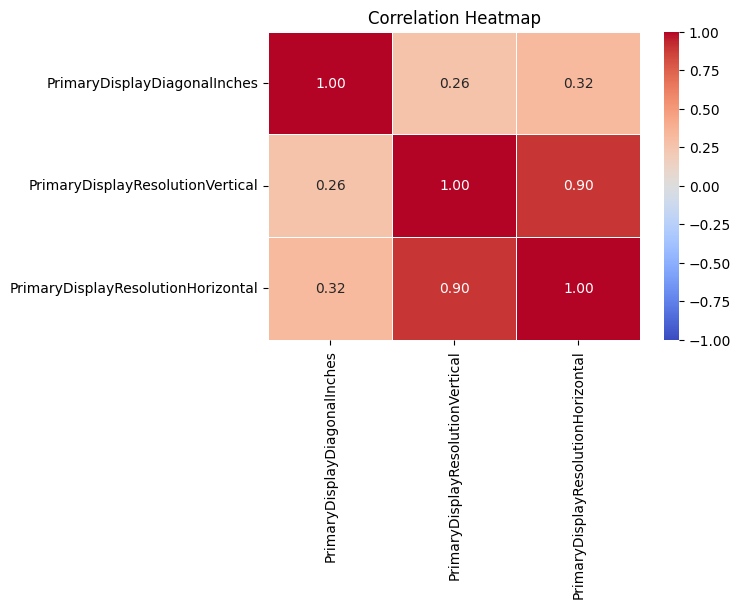

In [212]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5,vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

**Observation:**
1. Strong correlation (0.90) between **PrimaryDisplayResolutionVertical** and **PrimaryDisplayResolutionHorizontal** indicates that most screens maintain a proportional aspect ratio.
2. Weak correlation between screen size (**PrimaryDisplayDiagonalInches**) and **resolution** (0.26-0.32) suggests that larger screens do not always have higher resolution.

**2.3.2. Categorical vs Categorical Analysis**

**1. DeviceFamily vs OSArchitecture**

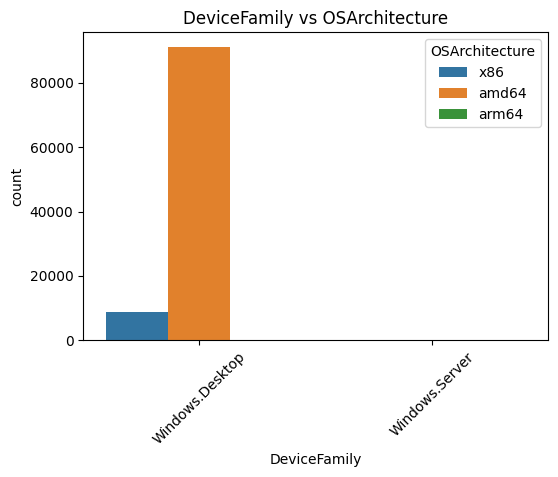

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='DeviceFamily', hue='OSArchitecture')
plt.xticks(rotation=45)
plt.title("DeviceFamily vs OSArchitecture")
plt.show()

**2. Processor vs OSVersion**

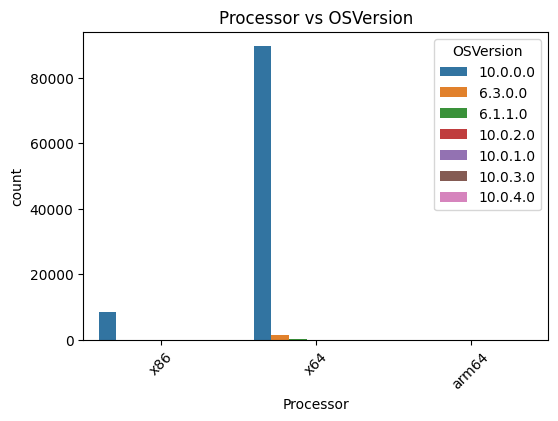

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='Processor', hue='OSVersion')
plt.xticks(rotation=45)
plt.title("Processor vs OSVersion")
plt.show()

**3, PlatformType vs Processor**

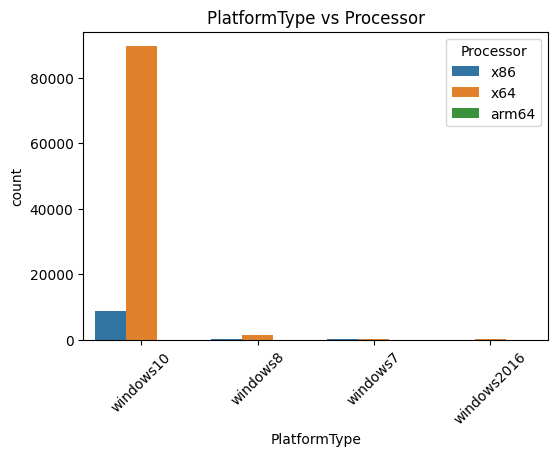

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='PlatformType', hue='Processor')
plt.xticks(rotation=45)
plt.title("PlatformType vs Processor")
plt.show()

**4. Categorical Columns vs Target**

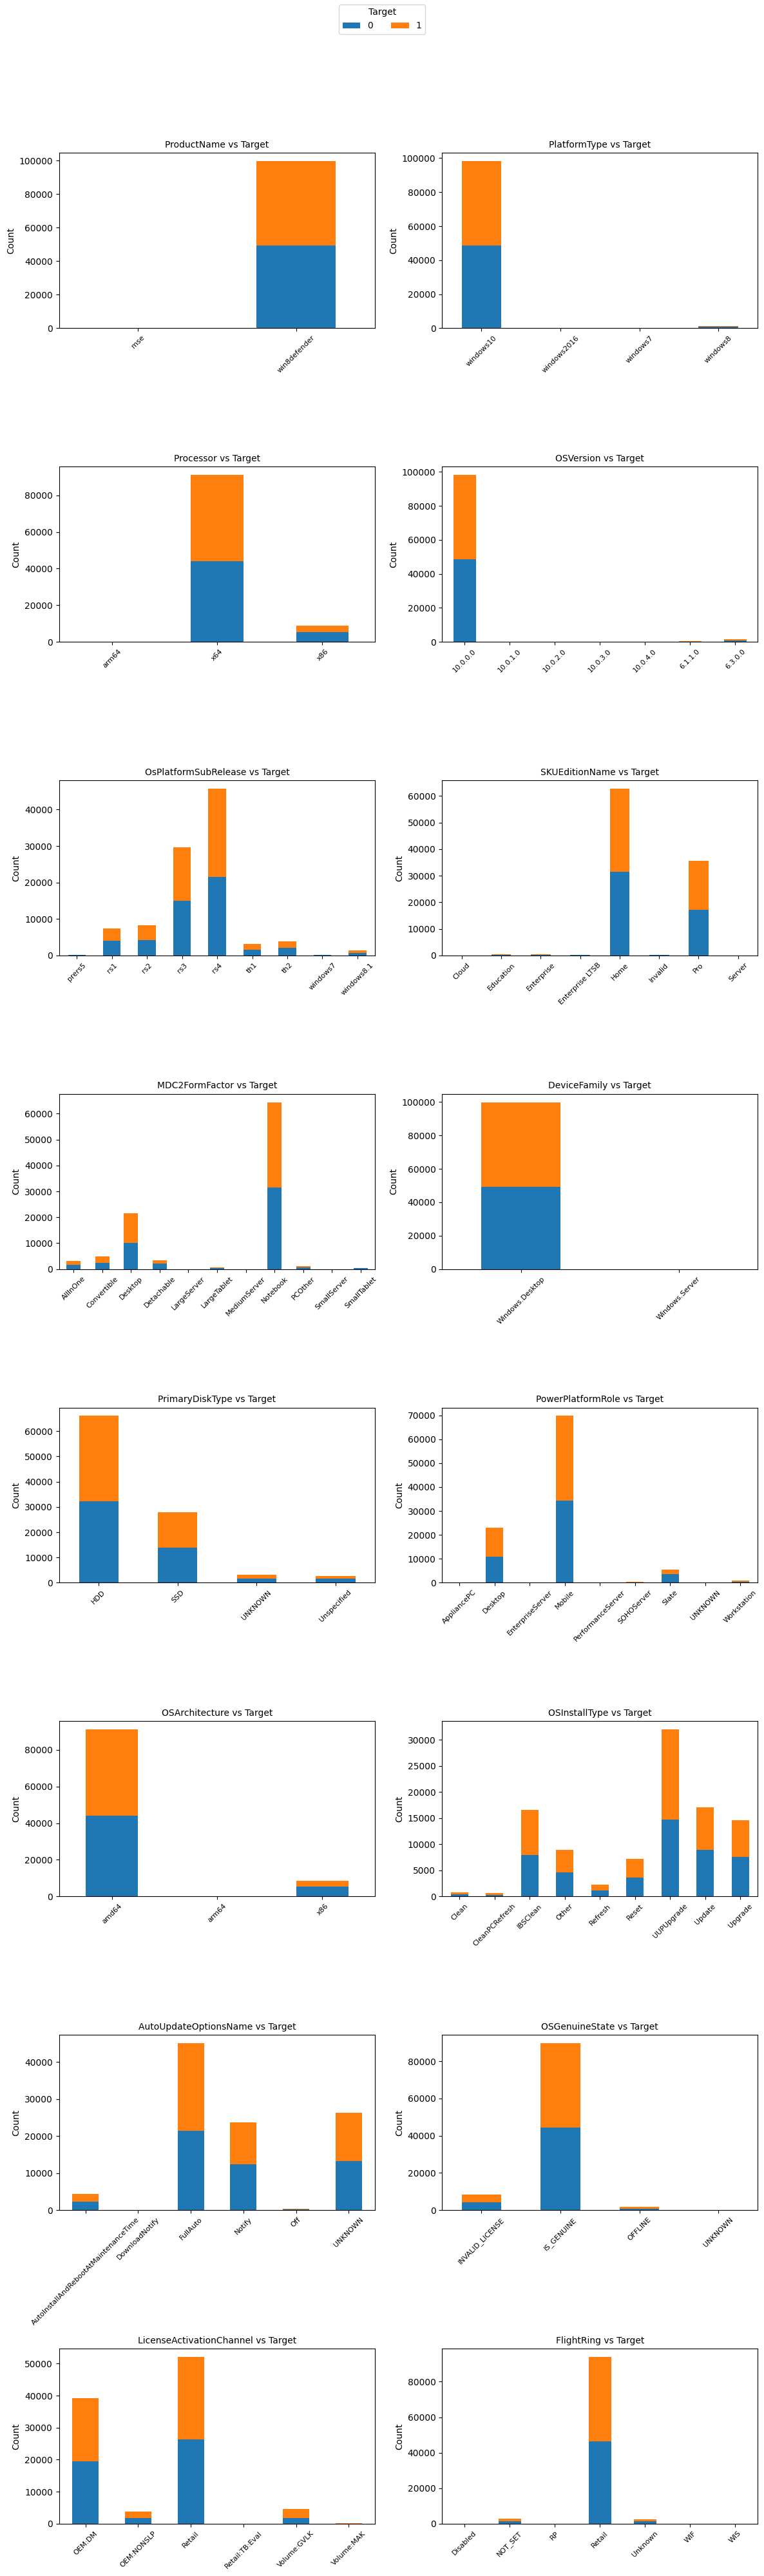

In [216]:
categorical_columns = [col for col in cat_cols if train_df[col].nunique() <= 11]

num_columns = 2
num_rows = (len(categorical_columns) + num_columns - 1) // num_columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 5))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    ct = pd.crosstab(train_df[col], train_df['target'])
    ct.plot(kind='bar', stacked=True, ax=axes[i], legend=False)
    axes[i].set_title(f'{col} vs Target', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, title='Target')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Bivariate Analysis between CountryID, CityID and GeoRegionID**

In [217]:
train_df[['CountryID', 'CityID', 'GeoRegionID']].nunique()

CountryID        220
CityID         16047
GeoRegionID      239
dtype: int64

In [218]:
df_corr = train_df[['CountryID', 'CityID', 'GeoRegionID']]
corr_matrix = df_corr.corr(method='pearson')
print(corr_matrix)

             CountryID    CityID  GeoRegionID
CountryID     1.000000 -0.000615     0.597077
CityID       -0.000615  1.000000    -0.060965
GeoRegionID   0.597077 -0.060965     1.000000


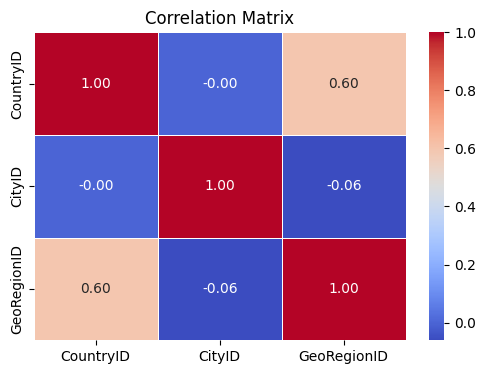

In [219]:
# Vizualize the Corr matrix with HeatMap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Above diagram shows that there are moderate correlation between CountryID and GeoRegionID, so we can combine CountryID and GeoRegionID using KMeans

Drop the CountryID and GeoRegionID columns and create new column named Location after combining these columns

# **3. Feature Engineering**

## **3.1. Training and Validation Split**

In [220]:
# Training and Validation Split
X_train, X_val, y_train, y_val = train_test_split(train_df.drop('target', axis=1), train_df['target'], random_state=42, test_size=0.2)

In [221]:
# X_train, y_train = train_df.drop('target', axis=1), train_df['target']
X_test = test_df
X_train.shape, X_val.shape, X_test.shape

((79868, 71), (19967, 71), (10000, 71))

In [222]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns
len(num_cols), len(cat_cols)

(44, 25)

## **3.2. Modify the columns**

*After analyzing the data during EDA, I observed that some categories had very few occurrences. To simplify the dataset and reduce the number of unique values, I merged these less frequent categories.*

*This helps in optimizing the encoding process using One-Hot Encoding by reducing dimensionality and improving model efficiency.*

**1. EngineVersion**

In [223]:
print("Unique Values :",X_train['EngineVersion'].nunique())

Unique Values : 36


In [224]:
# Merge some rows which has valuecounts less than 500

counts = X_train['EngineVersion'].value_counts()
repl = counts[counts<=500].index
X_train['EngineVersion'] = X_train['EngineVersion'].replace(repl, 'Other')
X_val['EngineVersion'] = X_val['EngineVersion'].replace(repl, 'Other')
X_test['EngineVersion'] = X_test['EngineVersion'].replace(repl, 'Other')

In [225]:
print("Unique Values :",X_train['EngineVersion'].nunique())

Unique Values : 7


**2. AppVersion**

In [226]:
print("Unique Values : ",X_train['AppVersion'].nunique())

Unique Values :  69


In [227]:
# Split the AppVersion to merge sub-version
X_train['AppVersion'] = X_train['AppVersion'].astype(str)
X_train['AppVersion'] = X_train['AppVersion'].str.split('.').str[:3].str.join(".")

X_val['AppVersion'] = X_val['AppVersion'].astype(str)
X_val['AppVersion'] = X_val['AppVersion'].str.split('.').str[:3].str.join(".")

X_test['AppVersion'] = X_test['AppVersion'].astype(str)
X_test['AppVersion'] = X_test['AppVersion'].str.split('.').str[:3].str.join(".")

In [228]:
# Merge rows which has less than 500 valuecounts to reduce no. of unique values

counts = X_train['AppVersion'].value_counts()
repl = counts[counts<=500].index
X_train['AppVersion'] = X_train['AppVersion'].replace(repl, 'Others')
X_val['AppVersion'] = X_val['AppVersion'].replace(repl, 'Others')
X_test['AppVersion'] = X_test['AppVersion'].replace(repl, 'Others')

In [229]:
print("Unique Values : ",X_train['AppVersion'].nunique())

Unique Values :  14


**3. SignatureVersion**

In [230]:
print("Unique Values : ",X_train['SignatureVersion'].nunique())

Unique Values :  2569


In [231]:
# Split the Signature Version to merge sub-versions
X_train['SignatureVersion'] = X_train['SignatureVersion'].astype(str)
X_train['SignatureVersion'] = X_train['SignatureVersion'].str.split('.').str[:2].str.join('.')

X_val['SignatureVersion'] = X_val['SignatureVersion'].astype(str)
X_val['SignatureVersion'] = X_val['SignatureVersion'].str.split('.').str[:2].str.join('.')

X_test['SignatureVersion'] = X_test['SignatureVersion'].astype(str)
X_test['SignatureVersion'] = X_test['SignatureVersion'].str.split('.').str[:2].str.join('.')

In [232]:
# Merge unique values with less than 200 valuecounts and replace with Others

counts = X_train['SignatureVersion'].value_counts()
repl = counts[counts<200].index
X_train['SignatureVersion'] = X_train['SignatureVersion'].replace(repl, 'Others')
X_val['SignatureVersion'] = X_val['SignatureVersion'].replace(repl, 'Others')
X_test['SignatureVersion'] = X_test['SignatureVersion'].replace(repl, 'Others')

In [233]:
print("Unique Values : ",X_train['SignatureVersion'].nunique())

Unique Values :  10


**4. OSVersion**

In [234]:
print("Unique Values : ",X_train['OSVersion'].nunique())

Unique Values :  6


In [235]:
# Split the OSVersion to merge sub-version
X_train['OSVersion'] = X_train['OSVersion'].astype(str)
X_train['OSVersion'] = X_train['OSVersion'].str.split('.').str[:2].str.join(".")

X_val['OSVersion'] = X_val['OSVersion'].astype(str)
X_val['OSVersion'] = X_val['OSVersion'].str.split('.').str[:2].str.join(".")

X_test['OSVersion'] = X_test['OSVersion'].astype(str)
X_test['OSVersion'] = X_test['OSVersion'].str.split('.').str[:2].str.join(".")

In [236]:
print("Unique Values : ",X_train['OSVersion'].nunique())

Unique Values :  3


**5. OSProductSuite**

In [237]:
print("Unique Values : ",X_train['OSProductSuite'].nunique())

Unique Values :  7


In [238]:
# Merge unique value with less than 1000 valuecounts and replace with -1
counts = X_train['OSProductSuite'].value_counts()
repl = counts[counts <= 1000].index
X_train['OSProductSuite'] = X_train['OSProductSuite'].replace(repl, -1)
X_val['OSProductSuite'] = X_val['OSProductSuite'].replace(repl, -1)
X_test['OSProductSuite'] = X_test['OSProductSuite'].replace(repl, -1)

In [239]:
print("Unique Values : ",X_train['OSProductSuite'].nunique())

Unique Values :  3


**6. OSBuildLab**

In [240]:
print("Unique Values : ",X_train['OSBuildLab'].nunique())

Unique Values :  269


In [241]:
X_train['OSBuildLab'] = X_train['OSBuildLab'].astype(str)
X_train['OSBuildLab'] = X_train['OSBuildLab'].str.split(".").str[:3].str.join('.')

X_val['OSBuildLab'] = X_val['OSBuildLab'].astype(str)
X_val['OSBuildLab'] = X_val['OSBuildLab'].str.split(".").str[:3].str.join('.')

X_test['OSBuildLab'] = X_test['OSBuildLab'].astype(str)
X_test['OSBuildLab'] = X_test['OSBuildLab'].str.split(".").str[:3].str.join('.')

In [242]:
# Merge value with less than 500 valuecounts and replace with Other
counts = X_train['OSBuildLab'].value_counts()
repl = counts[counts <= 500].index
X_train['OSBuildLab'] = X_train['OSBuildLab'].replace(repl, 'Other')
X_val['OSBuildLab'] = X_val['OSBuildLab'].replace(repl, 'Other')
X_test['OSBuildLab'] = X_test['OSBuildLab'].replace(repl, 'Other')

In [243]:
print("Unique Values : ",X_train['OSBuildLab'].nunique())

Unique Values :  10


**7. MDC2FormFactor**

In [244]:
print("Unique Values : ",X_train['MDC2FormFactor'].nunique())

Unique Values :  11


In [245]:
# Merge values with less than 1000 valuecounts and replace with other
counts = X_train['MDC2FormFactor'].value_counts()
repl = counts[counts <= 1000].index
X_train['MDC2FormFactor'] = X_train['MDC2FormFactor'].replace(repl, 'other')
X_val['MDC2FormFactor'] = X_val['MDC2FormFactor'].replace(repl, 'other')
X_test['MDC2FormFactor'] = X_test['MDC2FormFactor'].replace(repl, 'other')

In [246]:
print("Unique Values : ",X_train['MDC2FormFactor'].nunique())

Unique Values :  7


**8. PowerPlatformRole**

In [247]:
print("Unique Values : ",X_train['PowerPlatformRole'].nunique())

Unique Values :  8


In [248]:
# Merge values with less than 500 valuecounts and then replace with 'Other'
counts = X_train['PowerPlatformRole'].value_counts()
repl = counts[counts <= 500].index
X_train['PowerPlatformRole'] = X_train['PowerPlatformRole'].replace(repl, 'Other')
X_val['PowerPlatformRole'] = X_val['PowerPlatformRole'].replace(repl, 'Other')
X_test['PowerPlatformRole'] = X_test['PowerPlatformRole'].replace(repl, 'Other')

In [249]:
print("Unique Values : ",X_train['PowerPlatformRole'].nunique())

Unique Values :  5


**9. NumericOSVersion**

In [250]:
print("Unique Values : ",X_train['NumericOSVersion'].nunique())

Unique Values :  220


In [251]:
# Merge values with less than 1000 valuecounts and then replace with -1
counts = X_train['NumericOSVersion'].value_counts()
repl = counts[counts <= 1000].index
X_train['NumericOSVersion'] = X_train['NumericOSVersion'].replace(repl, 'Other')
X_val['NumericOSVersion'] = X_val['NumericOSVersion'].replace(repl, 'Other')
X_test['NumericOSVersion'] = X_test['NumericOSVersion'].replace(repl, 'Other')

In [252]:
print("Unique Values : ",X_train['NumericOSVersion'].nunique())

Unique Values :  16


**10. OSBranch**

In [253]:
print("Unique Values : ",X_train['OSBranch'].nunique())

Unique Values :  13


In [254]:
# Merge value with less than 1000 valuecounts and then replace with Other
counts = X_train['OSBranch'].value_counts()
repl = counts[counts <= 1000].index
X_train['OSBranch'] = X_train['OSBranch'].replace(repl, 'Other')
X_val['OSBranch'] = X_val['OSBranch'].replace(repl, 'Other')
X_test['OSBranch'] = X_test['OSBranch'].replace(repl, 'Other')

In [255]:
print("Unique Values : ",X_train['OSBranch'].nunique())

Unique Values :  9


**11. OSEdition**

In [256]:
print("Unique Values : ",X_train['OSEdition'].nunique())

Unique Values :  20


In [257]:
# Merge values with less than 5000 valuecounts and then replace with Other
counts = X_train['OSEdition'].value_counts()
repl = counts[counts <= 5000].index
X_train['OSEdition'] = X_train['OSEdition'].replace(repl, 'Other')
X_val['OSEdition'] = X_val['OSEdition'].replace(repl, 'Other')
X_test['OSEdition'] = X_test['OSEdition'].replace(repl, 'Other')

In [258]:
print("Unique Values : ",X_train['OSEdition'].nunique())

Unique Values :  4


**12. OSSkuFriendlyName**

In [259]:
print("Unique Values : ",X_train['OSSkuFriendlyName'].nunique())

Unique Values :  18


In [260]:
# Merge values with less than 1000 valuecounts and replace with Other
counts = X_train['OSSkuFriendlyName'].value_counts()
repl = counts[counts <= 1000].index
X_train['OSSkuFriendlyName'] = X_train['OSSkuFriendlyName'].replace(repl, 'Other')
X_val['OSSkuFriendlyName'] = X_val['OSSkuFriendlyName'].replace(repl, 'Other')
X_test['OSSkuFriendlyName'] = X_test['OSSkuFriendlyName'].replace(repl, 'Other')

In [261]:
print("Unique Values : ",X_train['MDC2FormFactor'].nunique())

Unique Values :  7


**13. OSInstallType**

In [262]:
print("Unique Values : ",X_train['OSInstallType'].nunique())

Unique Values :  9


In [263]:
# Merge values with less than 1000 valuecounts and replace with "Other"
counts = X_train['OSInstallType'].value_counts()
repl = counts[counts <= 1000].index
X_train['OSInstallType'] = X_train['OSInstallType'].replace(repl, 'Other')
X_val['OSInstallType'] = X_val['OSInstallType'].replace(repl, 'Other')
X_test['OSInstallType'] = X_test['OSInstallType'].replace(repl, 'Other')

In [264]:
print("Unique Values : ",X_train['OSInstallType'].nunique())

Unique Values :  7


**14. AutoUpdateOptionsName**

In [265]:
print("Unique Values : ",X_train['AutoUpdateOptionsName'].nunique())

Unique Values :  6


In [266]:
# Merge value with less than 1000 valuecounts and replace with Other
counts = X_train['AutoUpdateOptionsName'].value_counts()
repl = counts[counts <= 1000].index
X_train['AutoUpdateOptionsName'] = X_train['AutoUpdateOptionsName'].replace(repl, 'Other')
X_val['AutoUpdateOptionsName'] = X_val['AutoUpdateOptionsName'].replace(repl, 'Other')
X_test['AutoUpdateOptionsName'] = X_test['AutoUpdateOptionsName'].replace(repl, 'Other')

In [267]:
print("Unique Values : ",X_train['AutoUpdateOptionsName'].nunique())

Unique Values :  5


**15. LicenceActivationChannel**

In [268]:
print("Unique Values : ",X_train['LicenseActivationChannel'].nunique())

Unique Values :  6


In [269]:
# Merge values with less than 10000 valuecounts and replace with Other
counts = X_train['LicenseActivationChannel'].value_counts()
repl = counts[counts <= 10000].index
X_train['LicenseActivationChannel'] = X_train['LicenseActivationChannel'].replace(repl, 'Other')
X_val['LicenseActivationChannel'] = X_val['LicenseActivationChannel'].replace(repl, 'Other')
X_test['LicenseActivationChannel'] = X_test['LicenseActivationChannel'].replace(repl, 'Other')

In [270]:
print("Unique Values : ",X_train['LicenseActivationChannel'].nunique())

Unique Values :  3


**16. FlightRing**

In [271]:
print("Unique Values : ",X_train['FlightRing'].nunique())

Unique Values :  7


In [272]:
# Merge values with less than 1000 valuecounts and replace with Other
counts = X_train['FlightRing'].value_counts()
repl = counts[counts <= 1000].index
X_train['FlightRing'] = X_train['FlightRing'].replace(repl, 'Other')
X_val['FlightRing'] = X_val['FlightRing'].replace(repl, 'Other')
X_test['FlightRing'] = X_test['FlightRing'].replace(repl, 'Other')

In [273]:
print("Unique Values : ",X_train['FlightRing'].nunique())

Unique Values :  4


**17. DateOS**

***Impute the DateOS column with forward fill and extract the year and month from the DateOS column.***

In [274]:
# Fill the missing value of DateOS
X_train['DateOS'] = X_train['DateOS'].ffill()
X_val['DateOS'] = X_val['DateOS'].ffill()
X_test['DateOS'] = X_test['DateOS'].ffill()

In [275]:
X_train['DateOS'] = pd.to_datetime(X_train['DateOS'])
X_train['DateOS_Year'] = X_train['DateOS'].dt.year
X_train['DateOS_Month'] = X_train['DateOS'].dt.month

X_test['DateOS'] = pd.to_datetime(X_test['DateOS'])
X_test['DateOS_Year'] = X_test['DateOS'].dt.year
X_test['DateOS_Month'] = X_test['DateOS'].dt.month

X_val['DateOS'] = pd.to_datetime(X_val['DateOS'])
X_val['DateOS_Year'] = X_val['DateOS'].dt.year
X_val['DateOS_Month'] = X_val['DateOS'].dt.month

In [276]:
X_train.drop('DateOS', axis=1, inplace=True)
X_val.drop('DateOS', axis=1, inplace=True)
X_test.drop('DateOS', axis=1, inplace=True)

**18. DateAS**

***Extract the month and year from DateAS column and form new columns such as DateAS_Month and DateAS_Year***

In [277]:
X_train['DateAS'] = pd.to_datetime(X_train['DateAS'])
X_train['DateAS_Year'] = X_train['DateAS'].dt.year
X_train['DateAS_Month'] = X_train['DateAS'].dt.month

X_test['DateAS'] = pd.to_datetime(X_test['DateAS'])
X_test['DateAS_Year'] = X_test['DateAS'].dt.year
X_test['DateAS_Month'] = X_test['DateAS'].dt.month

X_val['DateAS'] = pd.to_datetime(X_val['DateAS'])
X_val['DateAS_Year'] = X_val['DateAS'].dt.year
X_val['DateAS_Month'] = X_val['DateAS'].dt.month

In [278]:
X_train.drop('DateAS', axis=1, inplace=True)
X_val.drop('DateAS', axis=1, inplace=True)
X_test.drop('DateAS', axis=1, inplace=True)

# **4. Apply Preprocessing**

In [279]:
# Define preprocessing Methods
mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')
knn_imputer = KNNImputer(n_neighbors=10)
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
kbin = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
scaler = StandardScaler()

In [280]:
# Check total Null values in training, validation and test set
X_train.isna().sum().sum(), X_val.isna().sum().sum(), X_test.isna().sum().sum()

(4994, 1189, 595)

In [281]:
bin_cols = [col for col in num_cols if X_train[col].nunique() >= 10]
len(bin_cols)

25

## **4.1. Pipelines**

In [282]:
# Pipeline for imputing using KNN Imputer then perform KBinDiscretizer
knn_kbin = Pipeline([
    ('imputer', knn_imputer),
    ('kbin', kbin)
])

In [283]:
# Pipeline for imputing using most_frequent value then perform OneHotEncoding
mode_ohe = Pipeline([
    ('imputer', mode_imputer),
    ('ohe', ohe)
])

## **4.2. ColumnTransformer**

In [284]:
# Preprocessor using ColumnTransformer
preprocessor = ColumnTransformer([
    ('kbin', knn_kbin, bin_cols),
    ('mode_ohe', mode_ohe, ['RealTimeProtectionState', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
                           'SMode', 'IsSystemProtected', 'FirewallEnabled', 'EnableLUA', 'ProcessorManufacturerID', 
                           'PrimaryDiskType', 'ChassisType', 'IsVirtualDevice', 'IsAlwaysOnAlwaysConnectedCapable', 
                           'IsGamer']),
    ('ohe', ohe, ['ProductName', 'EngineVersion', 'AppVersion', 'SignatureVersion', 'IsPassiveModeEnabled', 
                 'HasTpm', 'PlatformType', 'Processor', 'OSVersion', 'OSProductSuite', 'OsPlatformSubRelease', 
                 'OSBuildLab', 'SKUEditionName', 'MDC2FormFactor', 'DeviceFamily', 'HasOpticalDiskDrive', 
                 'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch', 'OSEdition', 'OSSkuFriendlyName', 
                 'OSInstallType', 'AutoUpdateOptionsName', 'IsPortableOS', 'OSGenuineState', 'LicenseActivationChannel', 
                 'FlightRing', 'IsSecureBootEnabled', 'IsTouchEnabled', 'IsPenCapable', 'DateOS_Year', 'DateOS_Month',
                 'DateAS_Year', 'DateAS_Month'])
], remainder='passthrough')

In [285]:
# Pipeline which includes Preprocessing of columns and perform StandardScaler on all to normalize the column values
preprocessor_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', scaler)
])

In [286]:
# Preprocess the training, validataion and test set
X_train_preprocessed = preprocessor_pipeline.fit_transform(X_train)
X_val_preprocessed = preprocessor_pipeline.transform(X_val)
X_test_preprocessed = preprocessor_pipeline.transform(X_test)

In [287]:
# Convert the preprocessed set into DataFrame
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns = preprocessor_pipeline.named_steps['preprocessor'].get_feature_names_out(), index = X_train.index)
X_val_preprocessed = pd.DataFrame(X_val_preprocessed, columns = preprocessor_pipeline.named_steps['preprocessor'].get_feature_names_out(), index = X_val.index)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns = preprocessor_pipeline.named_steps['preprocessor'].get_feature_names_out(), index=X_test.index)

In [288]:
# Shape of Dataframe after preprocessing
X_train_preprocessed.shape, X_val_preprocessed.shape, X_test_preprocessed.shape

((79868, 236), (19967, 236), (10000, 236))

In [289]:
# Check for null values after preprocessing
X_train_preprocessed.isna().sum().sum(), X_val_preprocessed.isna().sum().sum(), X_test_preprocessed.isna().sum().sum()

(0, 0, 0)

# **5. Model Training**

## **5.1. SGDClassifier**

In [290]:
# Initialize SGDClassifier
sgd = SGDClassifier(random_state=42)

In [291]:
# Define hyperparameter grid
param_dist = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': uniform(1e-5, 1e-2),
    'max_iter': [1000, 2000, 3000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': uniform(0.0001, 0.1)
}

# Perform Randomized Search CV
random_search_1 = RandomizedSearchCV(sgd, 
                                   param_distributions=param_dist, 
                                   n_iter=10, 
                                   scoring='accuracy', 
                                   cv=5, 
                                   random_state=42, 
                                   n_jobs=-1)

# Train the model
random_search_1.fit(X_train_preprocessed, y_train)

RandomizedSearchCV(cv=5, estimator=SGDClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fadb23588b0>,
                                        'eta0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fadb22612a0>,
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                                        'loss': ['hinge', 'log_loss',
                                                 'modified_huber'],
                                        'max_iter': [1000, 2000, 3000],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=42, scoring='accuracy')

In [292]:
best_sgd = random_search_1.best_estimator_
y_pred_val_1 = best_sgd.predict(X_val_preprocessed)

In [293]:
# Accuracy Score
accuracy_score(y_val, y_pred_val_1)

0.6109580808333751

In [294]:
# Confusion Matrix
cm_1 = confusion_matrix(y_val, y_pred_val_1)
cm_1

array([[5459, 4393],
       [3375, 6740]])

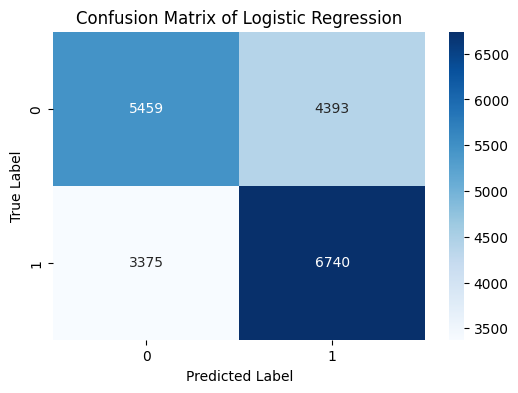

In [295]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

## **5.2. RandomForestClassifier**

In [296]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [297]:
# Hyperparameter Tuninig for RandomForestClassifier
param_grid =  {
    'n_estimators' : [100,200,300,400],
    'max_depth' : [10, 20, 30, None],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2,4],
    'max_features' : ['sqrt', 'log2'],
    'bootstrap' : [True, False]
}

random_search_2 = RandomizedSearchCV(
    estimator = rf,
    param_distributions = param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_2.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='accuracy', verbose=2)

In [298]:
best_rf = random_search_2.best_estimator_
y_pred_val_2 = best_rf.predict(X_val_preprocessed)

In [299]:
# Accuracy Score
accuracy_score(y_val, y_pred_val_2)

0.6170681624680723

In [300]:
# Confusion Matrix
cm_2 = confusion_matrix(y_val, y_pred_val_2)
cm_2

array([[5559, 4293],
       [3353, 6762]])

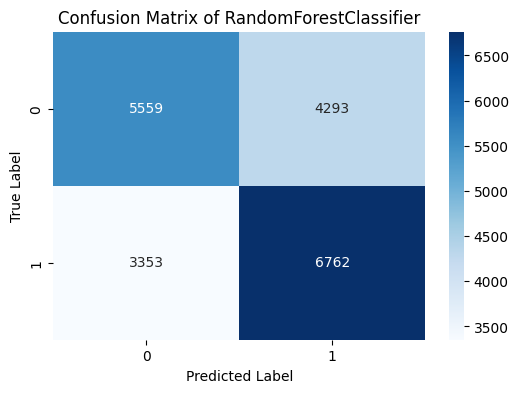

In [301]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()

## **5.3. Xgboost Classifier**

In [302]:
# Define the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    tree_method='hist',
    random_state=42
)

In [303]:
# Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],    
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'min_child_weight': [1, 3, 5]
}

random_search_3 = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_3.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 9, 12],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [304]:
best_xgb = random_search_3.best_estimator_
y_pred_val_3 = best_xgb.predict(X_val_preprocessed)

In [305]:
# Accuracy Score
accuracy_score(y_val, y_pred_val_3)

0.6229278309210197

In [306]:
# Confusion Matrix
cm_3 = confusion_matrix(y_val, y_pred_val_3)
cm_3

array([[5789, 4063],
       [3466, 6649]])

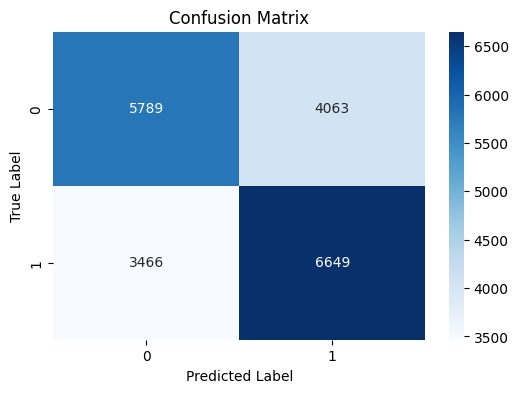

In [307]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **5.4. LightGBM Classifier**

In [308]:
# Define Lightgbm classifier
lgb_clf = lgb.LGBMClassifier(
    random_state=42
)

In [309]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9, 12, -1],
    'num_leaves': [20, 31, 40, 50],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

# Perform RandomizedSearchCV
random_search_4 = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model with RandomizedSearchCV
random_search_4.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 40328, number of negative: 39540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 79868, number of used features: 219
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504933 -> initscore=0.019733
[LightGBM] [Info] Start training from score 0.019733


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 9, 12, -1],
                                        'n_estimators': [100, 300, 500, 700,
                                                         1000],
                                        'num_leaves': [20, 31, 40, 50],
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'reg_lambda': [0.5, 1, 1.5, 2],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [310]:
best_lgb = random_search_4.best_estimator_
y_pred_val_4 = best_lgb.predict(X_val_preprocessed)

In [311]:
# Accuracy Score
accuracy_score(y_val, y_pred_val_4)

0.6235288225572194

In [312]:
# Confusion Matrix
cm_4 = confusion_matrix(y_val, y_pred_val_4)
cm_4

array([[5792, 4060],
       [3457, 6658]])

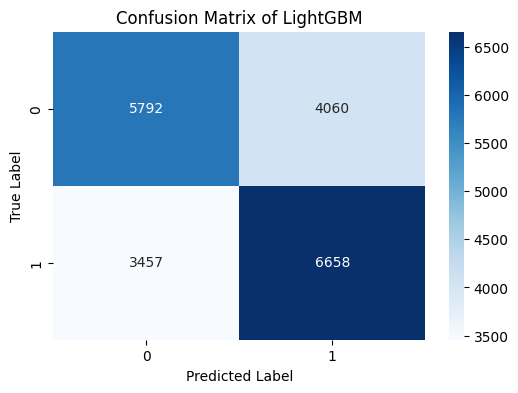

In [313]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of LightGBM')
plt.show()

## **5.5. Bagging Classifier**

In [314]:
# Base estimator
base_estimator = DecisionTreeClassifier()

# Bagging classifier
bagging_clf = BaggingClassifier(estimator=base_estimator, random_state=42, n_jobs=-1)

In [315]:
# Define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_samples': uniform(0.5, 0.5),
    'max_features': uniform(0.5, 0.5),
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# RandomizedSearch with 10 iterations
random_search_5 = RandomizedSearchCV(
    estimator=bagging_clf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Train the model
random_search_5.fit(X_train_preprocessed, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                               n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fadb3db33a0>,
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fadb511f070>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fadb346c520>},
                   random_state=42, scoring='accuracy', verbose=2)

In [316]:
best_bagging_clf = random_search_5.best_estimator_
y_pred_val_5 = best_bagging_clf.predict(X_val_preprocessed)

In [317]:
# Accuracy Score
accuracy_score(y_val, y_pred_val_5)

0.6107577502879752

In [318]:
# Confusion Matrix
cm_5 = confusion_matrix(y_val, y_pred_val_5)
cm_5

array([[5963, 3889],
       [3883, 6232]])

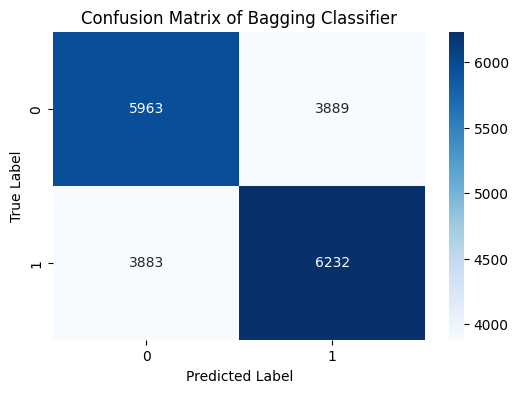

In [319]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_5, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Bagging Classifier')
plt.show()

## 5.6. HistGradientBoostingClassifier

In [320]:
# Initialize the model
hgb = HistGradientBoostingClassifier(random_state=42)

In [321]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_iter': [100, 200, 500],
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [10, 20, 50],
    'l2_regularization': [0, 1e-2, 1e-1, 1]
}

# Define the RandomizedSearchCV
random_search_6 = RandomizedSearchCV(
    estimator=hgb,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Train the model
random_search_6.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=HistGradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'l2_regularization': [0, 0.01, 0.1, 1],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, None],
                                        'max_iter': [100, 200, 500],
                                        'min_samples_leaf': [10, 20, 50]},
                   random_state=42, scoring='accuracy', verbose=2)

In [322]:
best_hgb = random_search_6.best_estimator_
y_pred_val_6 = best_hgb.predict(X_val_preprocessed)

In [323]:
# Accuracy Score
accuracy_score(y_val, y_pred_val_6)

0.6210246907397206

In [324]:
# Confusion Matrix
cm_6 = confusion_matrix(y_val, y_pred_val_6)
cm_6

array([[5666, 4186],
       [3381, 6734]])

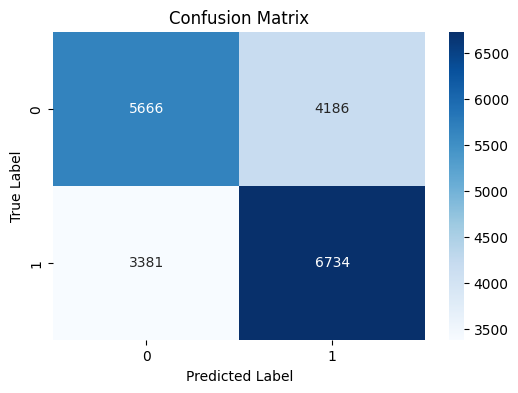

In [325]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_6, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **6. Score Comparision of Different Models**

In [326]:
# Accuracy Score of Validation set
print("Accuracy Score :")
print("Logistic Regression : ", round(accuracy_score(y_val, y_pred_val_1),4))
print("RandomForest Classifier : ", round(accuracy_score(y_val, y_pred_val_2),4))
print("XGBoost Classifier : ", round(accuracy_score(y_val, y_pred_val_3),4))
print("LightGBM Classifier : ", round(accuracy_score(y_val, y_pred_val_4),4))
print("Bagging Classifier : ", round(accuracy_score(y_val, y_pred_val_5),4))
print("HGB Classifier : ", round(accuracy_score(y_val, y_pred_val_6),4))

print("-----------------------------------------")

# Recall Score of Validation Set
print("Recall Score :")
print("Logistic Regression : ", round(recall_score(y_val, y_pred_val_1),4))
print('RandomForestClassifier', round(recall_score(y_val, y_pred_val_2),4))
print('XGBoostClassifier : ', round(recall_score(y_val, y_pred_val_3),4))
print('LightGBMClassifier : ', round(recall_score(y_val, y_pred_val_4),4))
print('BaggingClassifier : ', round(recall_score(y_val, y_pred_val_5),4))
print('HGBClassifier :', round(recall_score(y_val, y_pred_val_6),4))

print("-----------------------------------------")

# f1-score of Validation Set
print('F1 Score : ')
print("Logistic Regression : ", round(f1_score(y_val, y_pred_val_1),4))
print('RandomForest Classifier : ', round(f1_score(y_val, y_pred_val_2),4))
print('XGBoost Classifier : ', round(f1_score(y_val, y_pred_val_3),4))
print('LightGBM Classifier : ', round(f1_score(y_val, y_pred_val_4),4))
print('Bagging Classifier : ', round(f1_score(y_val, y_pred_val_5),4))
print('HGB Classifier : ', round(f1_score(y_val, y_pred_val_6),4))

Accuracy Score :
Logistic Regression :  0.611
RandomForest Classifier :  0.6171
XGBoost Classifier :  0.6229
LightGBM Classifier :  0.6235
Bagging Classifier :  0.6108
HGB Classifier :  0.621
-----------------------------------------
Recall Score :
Logistic Regression :  0.6663
RandomForestClassifier 0.6685
XGBoostClassifier :  0.6573
LightGBMClassifier :  0.6582
BaggingClassifier :  0.6161
HGBClassifier : 0.6657
-----------------------------------------
F1 Score : 
Logistic Regression :  0.6344
RandomForest Classifier :  0.6388
XGBoost Classifier :  0.6385
LightGBM Classifier :  0.6392
Bagging Classifier :  0.6159
HGB Classifier :  0.6403


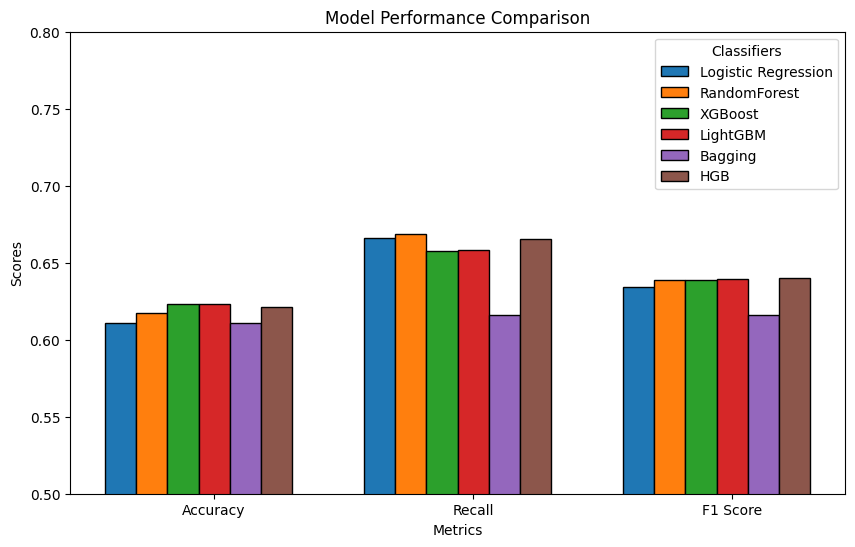

In [327]:
import matplotlib.pyplot as plt
import numpy as np

# Define classifiers and scores
classifiers = ['Logistic Regression', 'RandomForest', 'XGBoost', 'LightGBM', 'Bagging', 'HGB']
metrics = ['Accuracy', 'Recall', 'F1 Score']

accuracy_scores = [
    round(accuracy_score(y_val, y_pred_val_1), 4),
    round(accuracy_score(y_val, y_pred_val_2), 4),
    round(accuracy_score(y_val, y_pred_val_3), 4),
    round(accuracy_score(y_val, y_pred_val_4), 4),
    round(accuracy_score(y_val, y_pred_val_5), 4),
    round(accuracy_score(y_val, y_pred_val_6), 4)
]

recall_scores = [
    round(recall_score(y_val, y_pred_val_1), 4),
    round(recall_score(y_val, y_pred_val_2), 4),
    round(recall_score(y_val, y_pred_val_3), 4),
    round(recall_score(y_val, y_pred_val_4), 4),
    round(recall_score(y_val, y_pred_val_5), 4),
    round(recall_score(y_val, y_pred_val_6), 4)
]

f1_scores = [
    round(f1_score(y_val, y_pred_val_1), 4),
    round(f1_score(y_val, y_pred_val_2), 4),
    round(f1_score(y_val, y_pred_val_3), 4),
    round(f1_score(y_val, y_pred_val_4), 4),
    round(f1_score(y_val, y_pred_val_5), 4),
    round(f1_score(y_val, y_pred_val_6), 4)
]

# Combine all scores
scores = np.array([accuracy_scores, recall_scores, f1_scores])

# Bar chart settings
x = np.arange(len(metrics))
width = 0.12

# Create figure
plt.figure(figsize=(10, 6))

# Plot bars for each classifier
for i in range(len(classifiers)):
    plt.bar(x + i*width, scores[:, i], edgecolor='black', width=width, label=classifiers[i])

# Labels and title
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.xticks(x + (width*len(classifiers))/2, metrics)
plt.legend(title="Classifiers")
plt.ylim(0.50, 0.80)

# Show the plot
plt.show()

# **7. Submission** 

***After analyzing accuracy score of all the classifier model, we use LightGBM because it gives the higher accuracy.***

In [328]:
y_pred = best_lgb.predict(X_test_preprocessed)

In [329]:
submission = pd.DataFrame({
    'id': X_test.index,
    'target': y_pred
})
submission.to_csv('submission.csv', index=False)